<html>

<head>
<meta charset="UTF-8">
<title>Title of the document</title>
</head>

<body>
<h1 id="title">Plots from X-ray absorption calculations using ORCA</h1>
<p>Presentation of the feature engineering applied for ORCA outputs</p>
<p>Data presented here, as new inputs for this jupyter-notebook, comes from the written-shell pipeline created to extract X-ray excited-state features from some specific pair of atoms group (e.g. pair amino acid).</p>
<p>Outputs here are filtered features that account for specific transitions (coreMO -> virtualMO) for the specific pair of atoms group.</p>
</body>
</html>

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import csv as csv
from matplotlib.colors import ListedColormap
from matplotlib.pyplot import figure
from __future__ import print_function
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
import seaborn as sns
import math

____________________________

In [15]:
from scipy.optimize import leastsq
from scipy.optimize import curve_fit
from scipy.signal import find_peaks

In [16]:
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 18

--------------

<html>

<head>
<meta charset="UTF-8">
<title>Title of the document</title>
</head>

<body>
<h1 id="title">Löwdin Population analysis from </h1>
<h2 id="title"> X-ray absorption spectra calculated using PNO-DFT/ROCIS zora </h2>
<h3 id="title">    System of study: F ${---}$ Y</h3>
<h4 id="title">   non-covalent interaction distances varying from 2,5 to 11,0 $\dot{A}$ </h4>
</body>
</html>


#### Loading matrices (data from the pipeline's outputs)
Data in .csv format
##### residue called as A is acting as one at the ground state amino acid
> ##### resA core MO
##### residue called as B is acting as one at the virtual state amino acid
> ##### resB virtual MO

In a pair-aa interaction, e.g. Phe-Tyr, Phenylalanine stands for resA core MO and Tyrosine for resB virtual MO. And after, Tyrosine stands for resA core MO and Phenylalanine for resB virtual MO. Both are calculated and are within the spectra.

> ##### resA core MO - Phenylalanine

In [17]:
resa_A="resA_MOcore_AB_"
post="A_1-26.csv"
l_tmp = [85, 90, 95, 100, 105, 110]
list_suf = [i for i in range(25,81)]
for i in l_tmp:
    list_suf.append(i)

In [18]:
#Uncomment the original range to see more peaks outside the expected range

for ii in list_suf:
    globals()['resa_mocore_%s_AB_raw' % str(ii)] = pd.read_csv(resa_A+str(ii/10)+post, delimiter=',', index_col='num-1')
    #globals()['resa_mocore_%s_YF_raw' % str(ii)] = pd.read_csv(resa_trp+str(ii)+post, delimiter=',', index_col='num-1')

resa_mocore_27_AB_raw#.head()
#resa_mocore_27_YF_raw

,sym,lvl,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
num-1,,,,,,,,,,,,,,,,,,,,
1,C,s,0.0,0.0,0.0,0.0,99.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,C,s,99.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,C,s,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,99.3,0.0,0.0,0.0,0.0,0.0,0.0
6,C,s,0.0,0.0,0.0,0.0,0.0,99.5,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,C,s,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.3,0.0,0.0,0.0,0.0,0.0,95.7,3.5,0.0,0.0,0.0
8,C,s,0.0,0.0,0.0,0.0,0.0,0.1,0.9,0.0,0.0,0.0,98.4,0.2,0.0,0.0,0.0,0.0,0.0,0.0
9,C,s,0.0,0.0,0.0,0.0,0.0,0.0,98.1,0.3,0.0,0.0,0.9,0.0,0.0,0.0,0.3,0.0,0.0,0.0
10,C,s,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.3,0.0,0.0,0.0,0.0,0.0,3.6,95.4,0.0,0.0,0.0
11,C,s,0.0,0.0,0.0,0.0,0.0,0.0,0.3,98.7,0.0,0.0,0.0,0.0,0.0,0.2,0.5,0.0,0.0,0.0


> ##### resB virt MO - Tyrosinen

In [19]:
resb_B="resB_MOvirt_AB_"
post="A_1-26.csv"
for ii in list_suf:
    globals()['resb_movirt_%s_AB_raw' % str(ii)] = pd.read_csv(resb_B+str(ii/10)+post, delimiter=',', index_col='num-1')
    #globals()['resb_movirt_%s_YF_raw' % str(ii)] = pd.read_csv(resb_met+str(ii)+post, delimiter=',', index_col='num-1')

#resb_movirt_35_FY_raw.T.loc[['92']]#.head()
resb_movirt_27_AB_raw
#resb_movirt_27_YF_raw

,sym,lvl,92,93,94,95,96,101,102,103,104,105,106,109,117,118
num-1,,,,,,,,,,,,,,,,
0,atom,lvlMO,0.2,0.1,0.0,3.1,0.5,5.4,0.2,1.3,1.7,0.0,0.0,0.8,1.3,0.6
1,atom,lvlMO,0.3,1.4,0.1,4.3,1.7,2.9,0.0,0.5,2.3,1.0,0.2,2.6,0.4,2.1
2,atom,lvlMO,0.2,1.3,0.4,40.9,4.8,3.6,0.6,2.2,1.9,0.4,0.7,2.6,0.2,8.1
3,atom,lvlMO,0.0,0.2,0.0,6.8,2.9,1.6,0.3,0.4,0.2,0.7,0.2,1.4,0.0,1.1
4,atom,lvlMO,0.1,0.5,0.2,21.9,1.6,1.4,0.1,0.9,0.5,0.1,0.3,0.2,0.2,0.7
5,atom,lvlMO,0.2,1.1,0.1,2.9,2.6,0.5,0.8,0.5,1.4,1.4,1.7,3.4,0.5,2.4
6,atom,lvlMO,1.1,15.5,0.8,0.9,0.3,2.7,1.3,0.7,3.3,1.6,1.2,0.5,2.4,5.6
7,atom,lvlMO,8.0,8.1,0.2,0.5,0.6,2.5,3.7,2.3,5.8,1.8,1.0,1.3,2.7,4.2
8,atom,lvlMO,13.8,2.6,0.4,0.1,2.4,2.1,5.1,6.6,1.5,1.1,0.9,1.7,3.4,4.1


<html>


<body>
<h1 id="title">Features from  X-ray excited-state properties: </h1>
<h2 id="title">1. The number of transitions </h2>
<h2 id="title">2. The transitions averaged probability </h2>
<h2 id="title">3. The oscillator strength using electronic dipole moment as operator </h2>
<h2 id="title">4. The oscillator strength using velocity dipole moment as operator </h2>
</body>
</html>

#### coreMO vs. virtual MO (core/virt MO)
#### resA(Phe) --> resB(Tyr)

> ### 1. core/virt MO as function of the number of transitions

In [20]:
resab_AB="corevirtMO_matrix_AB_"# WF
post="A_1-26.csv"
for ii in list_suf:
    globals()['corevirtMO_matrix_%s_AB_raw' % str(ii)] = pd.read_csv(resab_AB+str(ii/10)+post, delimiter=',', index_col='virt\core')

corevirtMO_matrix_27_AB_raw.head()

,12,13,14,15,16,17,18,19,20,21,22,23,24
virt\core,,,,,,,,,,,,,
92,2,2,2,2,3,2,2,5,4,3,1,4,3
93,2,2,2,2,2,4,2,4,4,3,1,3,3
94,1,0,0,0,0,0,0,0,0,0,0,0,0
95,1,1,0,0,1,1,0,2,0,1,2,1,1
96,0,0,0,1,0,0,1,0,0,0,0,0,0


> ### 2. core/virt MO as function of the number of transitions averaged probability

In [21]:
resab_ts_AB="corevirtMO_matrix_tspb_AB_"
post="A_1-26.csv"
for ii in list_suf:
    globals()['corevirtMO_matrix_tspb_%s_AB_raw' % str(ii)] = pd.read_csv(resab_ts_AB+str(ii/10)+post, delimiter=',', index_col='virt\core')

corevirtMO_matrix_tspb_27_AB_raw.head()

,12,13,14,15,16,17,18,19,20,21,22,23,24
virt\core,,,,,,,,,,,,,
92,0.818741,0.447738,0.666192,0.521932,0.416348,0.687131,0.476200,0.431074,0.393727,0.754043,0.797100,0.754416,0.406492
93,0.673899,0.484338,0.812917,0.493517,0.460267,0.622015,0.440147,0.784489,0.392719,0.604853,0.905600,0.588035,0.615042
94,0.011600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
95,0.012700,0.012700,0.000000,0.000000,0.035100,0.011400,0.000000,0.019153,0.000000,0.011900,0.027957,0.040600,0.044400
96,0.000000,0.000000,0.000000,0.025000,0.000000,0.000000,0.029200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


> ### 3. core/virt MO as function of the oscillator strength using electronic dipole moment as operator
> #### by weighted (WSM) sum and weighted average (WAM)

In [22]:
resab_fosce_AB="corevirt_fosce_AB_" #same as FW
resab_foscwe_AB="corevirt_foscwe_AB_"
post="A_1-26.csv"
for ii in list_suf:
    globals()['corevirt_mo_fosce_%s_AB_raw' % str(ii)] = pd.read_csv(resab_fosce_AB+str(ii/10)+post, delimiter=',', index_col='virt\core')
    globals()['corevirt_mo_foscwe_%s_AB_raw' % str(ii)] = pd.read_csv(resab_foscwe_AB+str(ii/10)+post, delimiter=',', index_col='virt\core')

corevirt_mo_foscwe_75_AB_raw.head()

,12,13,14,15,16,17,18,19,20,21,22,23,24
virt\core,,,,,,,,,,,,,
92,0.025791,0.007445,0.020410,0.064188,0.032386,0.000000,0.000000,0.002741,0.003193,0.010218,0.000000,0.002522,0.000505
93,0.000360,0.040770,0.000358,0.000071,0.000544,0.034559,0.007907,0.001727,0.019951,0.031742,0.004734,0.041127,0.048152
94,0.011257,0.035920,0.004791,0.008616,0.010279,0.000000,0.007586,0.001808,0.021405,0.036711,0.000734,0.041126,0.025195
95,0.000000,0.000000,0.000000,0.000000,0.000000,0.037806,0.008313,0.000000,0.010748,0.000000,0.043131,0.003852,0.014078
96,0.039631,0.000771,0.011571,0.034318,0.043033,0.000000,0.000000,0.002877,0.003193,0.004561,0.000000,0.002496,0.000690


> ### 4. core/virt MO as function of the oscillator strength using velocity dipole moment as operator
> #### by weighted (WSM) sum and weighted average (WAM)

In [23]:
#resab_foscv_fy="corevirt_foscv_FY_"#same as YF
#resab_foscwv_fy="corevirt_foscwv_FY_"
#post=".csv"
#for ii in list_suf:
#    globals()['corevirt_mo_foscv_%s_FY_raw' % str(ii)] = pd.read_csv(resab_foscv_fy+str(ii)+post, delimiter=',', index_col='virt\core')
#    globals()['corevirt_mo_foscwv_%s_FY_raw' % str(ii)] = pd.read_csv(resab_foscwv_fy+str(ii)+post, delimiter=',', index_col='virt\core')

#corevirt_mo_foscv_27_FY_raw.head()

### Main functions to present data according to the features

In [24]:
def selecting_atm_matrix(df, atoms_list):
    """
    it returns MO matrix (df) having just the atoms in atoms_list.
    """
    col_list = df.index.tolist() #listing index (elements from column 0)
    #dff = df.loc[:, (df != 0).any(axis=0)] #removing zero columns
    return df.loc[[i for i in atoms_list if i in col_list]] #returning just columns in the both lists intersection
#atoms_core=resa_mocore_GFG9Y_raw.index.tolist() #all C-core atoms
#[i for i in atoms_a if i in atoms_core] #atoms_a intersection atoms_core

In [25]:
def nonzero_mo_matrix(df):
    """
    it returns MO matrix (df) having just non-zero MO population.
    """
    return df.loc[:, (df != 0).any(axis=0)] #removing zero columns

In [26]:
def crop_by_loewdin_p(df,pop):
    """
    it returns MO matrix (df) having just a Loewdin MO population contribution greater than (100*pop)%.
    pop is a number between 0 and 1.
    """
    #cols = [col for col, val in df.sum()[2:].iteritems() if val > (pop*100)]
    cols = [col for col, val in df.sum()[2:].items() if val > (pop*100)]
    #iteritem() create a zip with the index_col and the values
    cols.insert(0,'lvl')
    cols.insert(0,'sym')
    #to add on the top the first two columns removed in the previous sum() evaluation
    return df[cols] #showing the fisrt two columns and those having population greater than pop*100%

In [27]:
def cropping_matrix(df, df1, df2):
    """
    it returns a cropped MO matrix from df using as parameters the indices in df1 and df2.
    df1 index are column names from df and df2 index are the rows from df
    """
    try:
        dff = df[df1.axes[1][2:].tolist()] #saving specific columns
    except KeyError:
        tmp_mo = [item for item in df1.axes[1][2:].tolist() if item in df.axes[1][0:].tolist()]
        #removing items in the first list that are not in the second one
        dff = df[tmp_mo]
    try:
        return dff.loc[[int(i) for i in df2.axes[1][2:].tolist()]] #returning specific rows
    except KeyError:
        tmp_mo2 = [item for item in df2.axes[1][2:].tolist() if int(item) in dff.T.axes[1][0:].tolist()]
        # dff.T to obtain the index_col as the head row
        return dff.loc[[int(i) for i in tmp_mo2]] #returning specific rows
# the first two elements in df2.axes[1] and df1.axes[1] are "sym" and "lvl", that's why I used df.axes[1][2:]

<html>


<body>
<h3 id="title">Reducing Löwdin Population MO matrices by removing non-contributing MO</h3>
<h4> Case for core MO in the resA</h4>
</body>
</html>

In [28]:
for ii in list_suf:
    globals()['resa_mocore_%s_AB' % str(ii)] = nonzero_mo_matrix(globals()['resa_mocore_%s_AB_raw' % str(ii)])
    #globals()['resa_mocore_%s_YF' % str(ii)] = nonzero_mo_matrix(globals()['resa_mocore_%s_YF_raw' % str(ii)])

resa_mocore_27_AB#.head()
#resa_mocore_27_YF.head()

,sym,lvl,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
num-1,,,,,,,,,,,,,,,,,,,,
1,C,s,0.0,0.0,0.0,0.0,99.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,C,s,99.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,C,s,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,99.3,0.0,0.0,0.0,0.0,0.0,0.0
6,C,s,0.0,0.0,0.0,0.0,0.0,99.5,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,C,s,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.3,0.0,0.0,0.0,0.0,0.0,95.7,3.5,0.0,0.0,0.0
8,C,s,0.0,0.0,0.0,0.0,0.0,0.1,0.9,0.0,0.0,0.0,98.4,0.2,0.0,0.0,0.0,0.0,0.0,0.0
9,C,s,0.0,0.0,0.0,0.0,0.0,0.0,98.1,0.3,0.0,0.0,0.9,0.0,0.0,0.0,0.3,0.0,0.0,0.0
10,C,s,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.3,0.0,0.0,0.0,0.0,0.0,3.6,95.4,0.0,0.0,0.0
11,C,s,0.0,0.0,0.0,0.0,0.0,0.0,0.3,98.7,0.0,0.0,0.0,0.0,0.0,0.2,0.5,0.0,0.0,0.0


<html>

<body>
<h4> Case for virtual MO in the resB</h4>
</body>
</html>
<html>

In [29]:
for ii in list_suf:
    globals()['resb_movirt_%s_AB' % str(ii)] = nonzero_mo_matrix(globals()['resb_movirt_%s_AB_raw' % str(ii)])
    #globals()['resb_movirt_%s_YF' % str(ii)] = nonzero_mo_matrix(globals()['resb_movirt_%s_YF_raw' % str(ii)])

resb_movirt_27_AB#.head()
#resb_movirt_27_YF#.head()

,sym,lvl,92,93,94,95,96,101,102,103,104,105,106,109,117,118
num-1,,,,,,,,,,,,,,,,
0,atom,lvlMO,0.2,0.1,0.0,3.1,0.5,5.4,0.2,1.3,1.7,0.0,0.0,0.8,1.3,0.6
1,atom,lvlMO,0.3,1.4,0.1,4.3,1.7,2.9,0.0,0.5,2.3,1.0,0.2,2.6,0.4,2.1
2,atom,lvlMO,0.2,1.3,0.4,40.9,4.8,3.6,0.6,2.2,1.9,0.4,0.7,2.6,0.2,8.1
3,atom,lvlMO,0.0,0.2,0.0,6.8,2.9,1.6,0.3,0.4,0.2,0.7,0.2,1.4,0.0,1.1
4,atom,lvlMO,0.1,0.5,0.2,21.9,1.6,1.4,0.1,0.9,0.5,0.1,0.3,0.2,0.2,0.7
5,atom,lvlMO,0.2,1.1,0.1,2.9,2.6,0.5,0.8,0.5,1.4,1.4,1.7,3.4,0.5,2.4
6,atom,lvlMO,1.1,15.5,0.8,0.9,0.3,2.7,1.3,0.7,3.3,1.6,1.2,0.5,2.4,5.6
7,atom,lvlMO,8.0,8.1,0.2,0.5,0.6,2.5,3.7,2.3,5.8,1.8,1.0,1.3,2.7,4.2
8,atom,lvlMO,13.8,2.6,0.4,0.1,2.4,2.1,5.1,6.6,1.5,1.1,0.9,1.7,3.4,4.1


___________________________

<html>

<head>
<meta charset="UTF-8">
</head>

<body>
<h3 id="title">Results</h3>
<h4 id="title">Features presentation</h4>
</body>
</html>

<html>

<head>
<meta charset="UTF-8">
</head>

<body>
<h4 id="title">Pair-aa distance in Å</h4>
</body>
</html>

______________________________

#### Plotting

In [30]:
def plot_alot_xray(global_name, list_suf, x_arg, y_arg, xlmt=False, xmin=288, xmax=310, label=None, \
              scalec=False, ref_list=list_suf, plotsvg=False, nameplt='figure.svg',\
              figsize=(16, 10), dpi=80, linestyle='-', marker='o', linewidth=1.3, markersize=1.3):
    """
    Function to plot a customize X-ray spectra (on development)
    global_name is the list of names for the different pd data frame
    list_suf is a list that contains the differentiable part of the global_name
    x_arg and y_arg are the columns data to plot from pd data frame
    label is a list of labels for each plot
    
    Range of color fading away can be change by changing boleean value in scalec
    and setting ref_list with a list that contains the differentiable part of the
    global_name. if list_suf and ref_list are different, scale of color will be different
    (on revision)
    
    To define a new xrange to plot, it is convenient just to load specific ranges
    from the dataframe in global_name. Then, change xlmt to True and set the values
    as minimun (xmin) and maximum (xmax) in the x-axis of the plot.
    """
    
    #defining scale of colors to use in  the cmap selected
    if scalec:
        colors=matplotlib.pyplot.get_cmap(name='coolwarm')(np.linspace(0.05, 0.85, len(ref_list)))
    else:
        colors=matplotlib.pyplot.get_cmap(name='coolwarm')(np.linspace(0.05, 0.85, len(list_suf)))
    if label==None:
        label=[]
        label=['_nolegend_' for ii in list_suf]

    fig = plt.figure(figsize=figsize, dpi=dpi)
    n1 = fig.add_subplot(111)
    cc=0
    if xlmt:
        for ii in list_suf:#using xmin and xmax as new range to plot data frames
            n1.plot(x_arg, y_arg, data=newxrange(global_name[cc], x_arg, xmin, xmax), \
                    linestyle=linestyle, marker=marker, linewidth=linewidth, \
                    markersize=markersize, color=colors[cc], label=label[cc])
            cc+=1
    else:
        for ii in list_suf:
            n1.plot(x_arg, y_arg, data=global_name[cc], linestyle=linestyle, marker=marker, \
                    linewidth=linewidth, markersize=markersize, color=colors[cc], label=label[cc])
            cc+=1

    cmap = plt.get_cmap("coolwarm", len(list_suf))
    norm= matplotlib.colors.BoundaryNorm(np.linspace(0.05, 0.85, len(list_suf)),len(list_suf))
    #np.arange(0,len(list_suf)+1)-0.5, len(list_suf))
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    plt.colorbar(sm, ticks=np.arange(0,len(list_suf)))#np.array(list_suf)/10)#ticks=np.arange(0,len(list_suf),2))

    plt.xlabel('Energy (eV)')
    plt.ylabel('Intensity (Oscillator strength)')
    #plt.legend(loc='upper left');
    plt.show()
    if plotsvg:
        fig.savefig(nameplt, format="svg")
    

_________________________

In [31]:
atomAi = 0
atomAf = 22
atomBi = 23
atomBf = 46

In [32]:
tmp_f = []
for ii in list_suf:
    tmp = (globals()['corevirt_mo_fosce_%s_AB_raw' % str(ii)]*\
           globals()['corevirt_mo_fosce_%s_AB_raw' % str(ii)]).sum()/\
    globals()['corevirt_mo_fosce_%s_AB_raw' % str(ii)].sum()
    tmp = ((tmp*tmp).sum())/tmp.sum()
    tmp_f.append(tmp)

weighted_fosce = pd.DataFrame({'Distance': [ii/10 for ii in list_suf],\
                               'ws_fosce': [i for i in tmp_f]
                              })

<AxesSubplot:xlabel='Distance'>

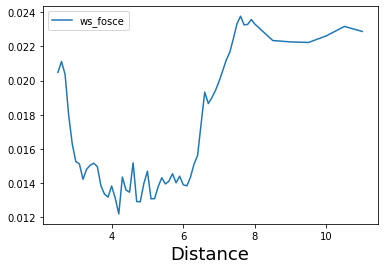

In [33]:
weighted_fosce.plot(x='Distance', y='ws_fosce', style='-')

### BGA product

In [34]:
def ts_psb_acore_bvirt(acore, bvirt, abcorevirt, atm_to_virtmo=False):
    """
    Do a matrix multiplication between the core-to-virt transition 
    probabilities matrix and the core MO matrix, then the resulting matrix
    is multiplied by the virtual MO matrix.
    if atm_to_virtmo is True, then the two resulting matrices in the 
    multiplication process are returned.
    By the default, just the last matrix is returned.
    """
    abcorevirt.index = abcorevirt.index.astype('str') 
    #to make possible the dot product in pandas, the indexes involved in each
    #product have to "match" in name and type
    
    i = j = 0
    dff = pd.DataFrame(np.zeros((acore.shape[0], abcorevirt.shape[0])), \
                       index=acore.index, columns=abcorevirt.index)
    for j in range(abcorevirt.shape[1]):
        for i in range(acore.shape[1]):
            try:
                dff += acore.T[i:i+1].T.dot(abcorevirt.iloc[:].T[j:j+1])
            except:
                pass
            
    dff = dff/100
    i = j = 0
    dff2 = pd.DataFrame(np.zeros((dff.shape[0], bvirt.shape[0])), \
                        index=dff.index, columns=bvirt.index)
    for i in range(dff.shape[1]):
        for j in range(bvirt.shape[1]):
            try:
                dff2 += dff.T[i:i+1].T.dot(bvirt.T[j:j+1])
            except:
                pass
    
    if atm_to_virtmo:
        return dff, dff2
    else:
        return dff2

_________________________________________________

In [35]:
#acore = resa_mocore_95_FY.T[2:].T
#bvirt = resb_movirt_95_FY_pop.T[2:].T
#abcorevirt = corevirtMO_matrix_tspb_95_FY_pop

In [36]:
# WSM case
for ii in list_suf:
    globals()['heatmap_%s_AB_raw' % str(ii)] = ts_psb_acore_bvirt(globals()['resa_mocore_%s_AB' % str(ii)].T[2:].T,\
    globals()['resb_movirt_%s_AB_raw' % str(ii)].T[2:].T,\
    globals()['corevirt_mo_fosce_%s_AB_raw' % str(ii)])

In [37]:
# WAM case
for ii in list_suf:
    globals()['heatmapw_%s_AB_raw' % str(ii)] = ts_psb_acore_bvirt(globals()['resa_mocore_%s_AB' % str(ii)].T[2:].T,\
    globals()['resb_movirt_%s_AB_raw' % str(ii)].T[2:].T,\
    globals()['corevirt_mo_foscwe_%s_AB_raw' % str(ii)])

In [38]:
#newdf42 = ts_psb_acore_bvirt(resa_mocore_42_FY.T[2:].T,\
#                                    resb_movirt_42_FY_raw.T[2:].T,\
#                             corevirt_mo_fosce_42_FY_raw)

In [39]:
def sum_Mm(dfbig, dfsmall):
    """
    in a dfbig matrix, the elements from dfsmall matrix are summed according
    to its index and columns matches in dfbig index and columns
    values
    """
    for i in dfsmall.index.values:
        for j in dfsmall.columns.values:
            try:
                dfbig.loc[[i],[j]] += dfsmall.loc[[i],[j]]
            except:
                pass
    return dfbig

In [40]:
for ii in list_suf:
    globals()['heatmap_%s_AB_raw' % str(ii)].index.names = ['core-atom']
    globals()['heatmap_%s_AB_raw' % str(ii)].columns.names = ['virtual-atom']

In [41]:
for ii in list_suf:
    globals()['heatmapw_%s_AB_raw' % str(ii)].index.names = ['core-atom']
    globals()['heatmapw_%s_AB_raw' % str(ii)].columns.names = ['virtual-atom']

In [42]:
for ii in list_suf:
    globals()['heatmap_%s_AB' % str(ii)] = \
    globals()['heatmap_%s_AB_raw' % str(ii)].apply(pd.to_numeric).sort_index(ascending=True)

In [43]:
for ii in list_suf:
    globals()['heatmapw_%s_AB' % str(ii)] = \
    globals()['heatmapw_%s_AB_raw' % str(ii)].apply(pd.to_numeric).sort_index(ascending=True)

In [44]:
#### 35

In [45]:
rel_list = []
for ii in list_suf[10:58]:
    rel_list.append(globals()['heatmap_%s_AB' % str(ii)].max().max())
relmax = max(rel_list)
relmin = min(rel_list)

In [46]:
rel_listw = []
for ii in list_suf[10:58]:
    rel_listw.append(globals()['heatmapw_%s_AB' % str(ii)].max().max())
relmaxw = max(rel_listw)
relminw = min(rel_listw)

In [47]:
relmin, relmax

(0.5440394435611963, 1.1369871456805003)

In [48]:
relminw, relmaxw

(1.9587415308197995, 4.744027754066999)

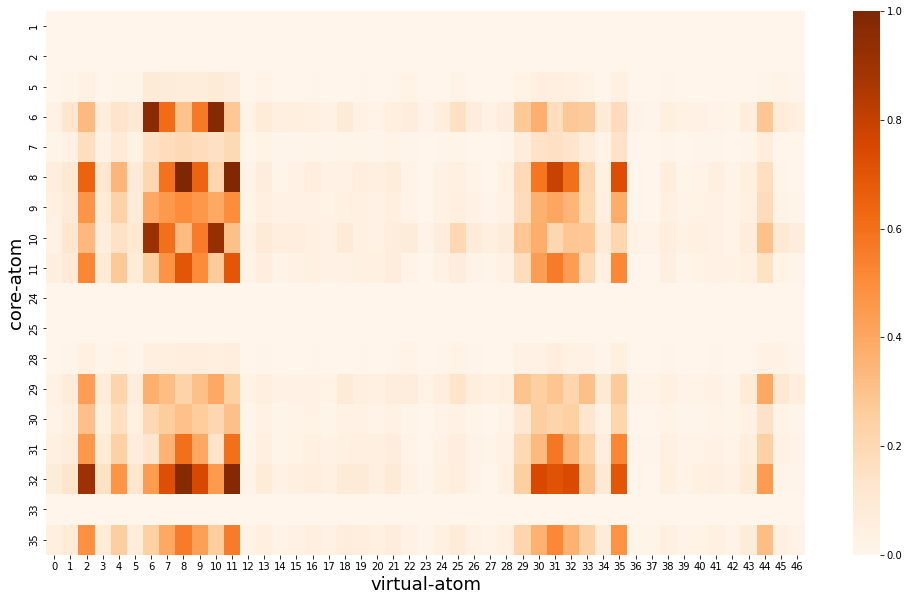

In [49]:
fig, ax = plt.subplots(figsize=(17,10)) 

test = (heatmap_38_AB - heatmap_38_AB.min().min())/(heatmap_38_AB.max().max() - heatmap_38_AB.min().min())

sns.heatmap(test, annot=False, cmap='Oranges', vmin=0, vmax=1, ax=ax)
fig.savefig('FGL_FY_38.svg', format="svg")

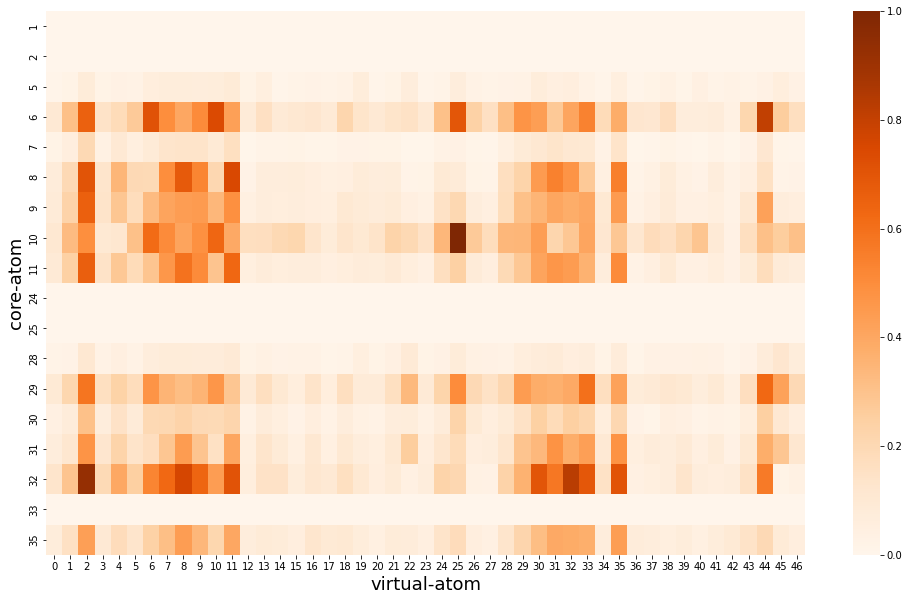

In [50]:
fig, ax = plt.subplots(figsize=(17,10)) 

test = (heatmapw_38_AB - heatmapw_38_AB.min().min())/(heatmapw_38_AB.max().max() - heatmapw_38_AB.min().min())

sns.heatmap(test, annot=False, cmap='Oranges', vmin=0, vmax=1, ax=ax)
fig.savefig('FGLw_FY_38.svg', format="svg")

<AxesSubplot:xlabel='virtual-atom', ylabel='core-atom'>

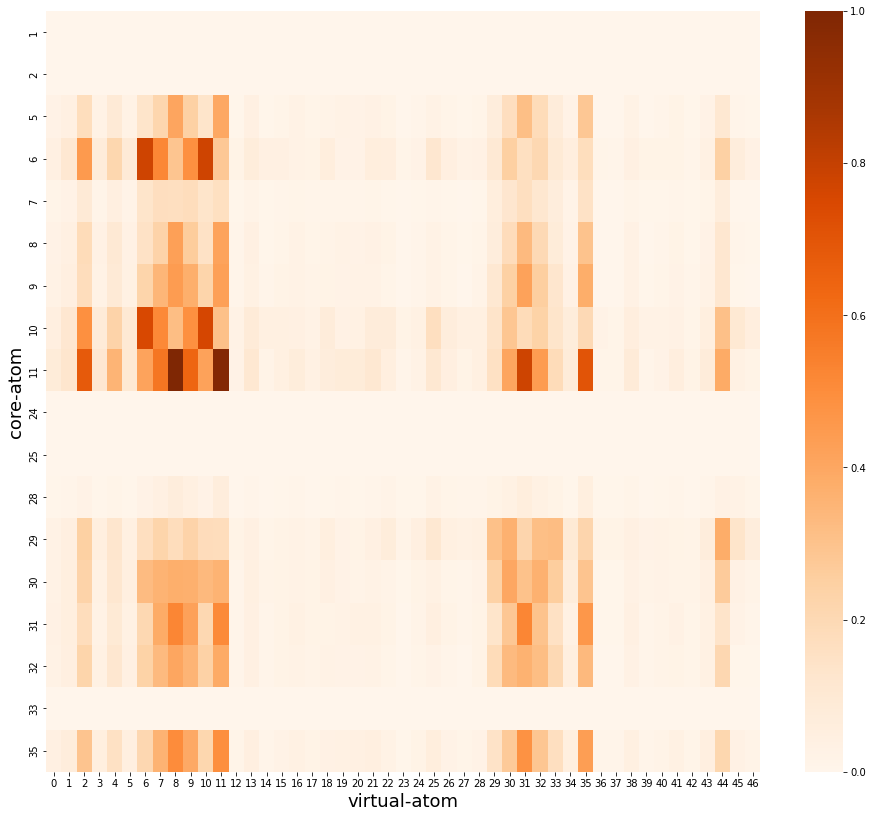

In [51]:
fig, ax = plt.subplots(figsize=(16,14)) 

test = (heatmap_42_AB - heatmap_42_AB.min().min())/(heatmap_42_AB.max().max() - heatmap_42_AB.min().min())

sns.heatmap(test, annot=False, cmap='Oranges', vmin=0, vmax=1, ax=ax)

<AxesSubplot:xlabel='virtual-atom', ylabel='core-atom'>

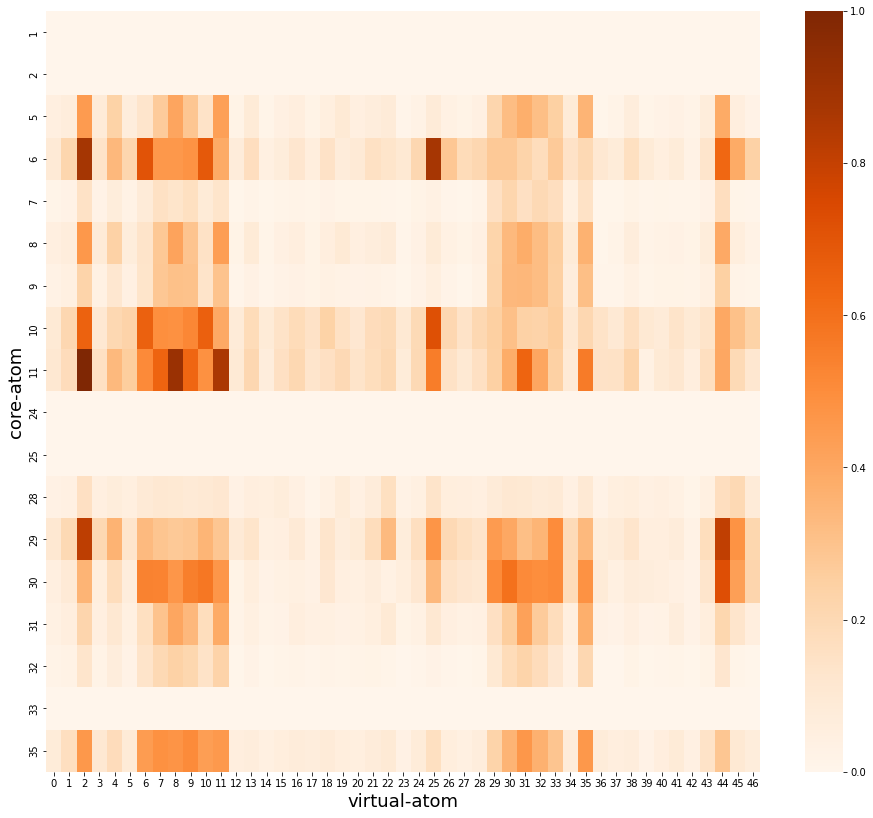

In [52]:
fig, ax = plt.subplots(figsize=(16,14)) 

test = (heatmapw_42_AB - heatmapw_42_AB.min().min())/(heatmapw_42_AB.max().max() - heatmapw_42_AB.min().min())

sns.heatmap(test, annot=False, cmap='Oranges', vmin=0, vmax=1, ax=ax)

<AxesSubplot:xlabel='virtual-atom', ylabel='core-atom'>

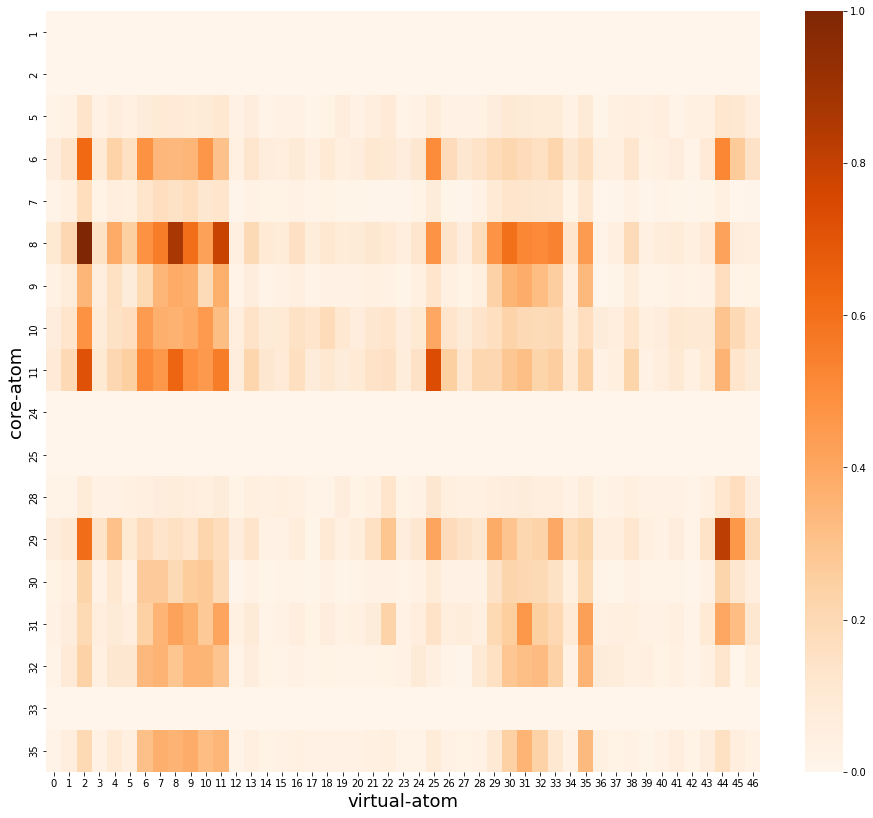

In [53]:
fig, ax = plt.subplots(figsize=(16,14)) 

test = (heatmapw_45_AB - heatmapw_45_AB.min().min())/(heatmapw_45_AB.max().max() - heatmapw_45_AB.min().min())

sns.heatmap(test, annot=False, cmap='Oranges', vmin=0, vmax=1, ax=ax)

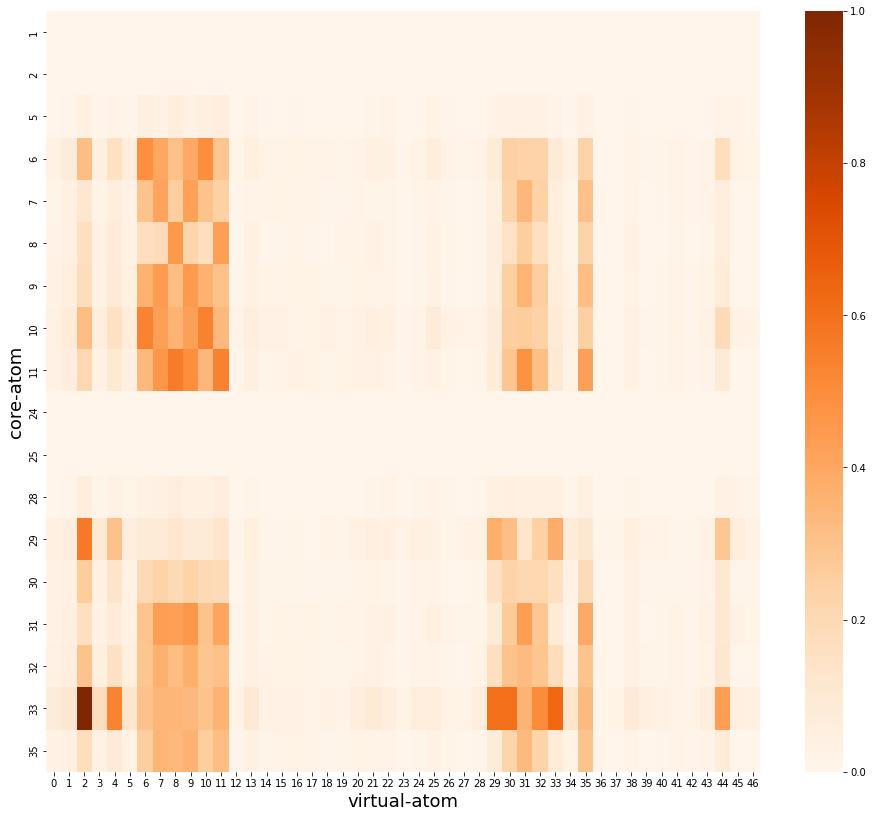

In [54]:
fig, ax = plt.subplots(figsize=(16,14)) 

test = (heatmap_48_AB - heatmap_48_AB.min().min())/(heatmap_48_AB.max().max() - heatmap_48_AB.min().min())

sns.heatmap(test, annot=False, cmap='Oranges', vmin=0, vmax=1, ax=ax)
fig.savefig('FGL_FY_48.svg', format="svg")

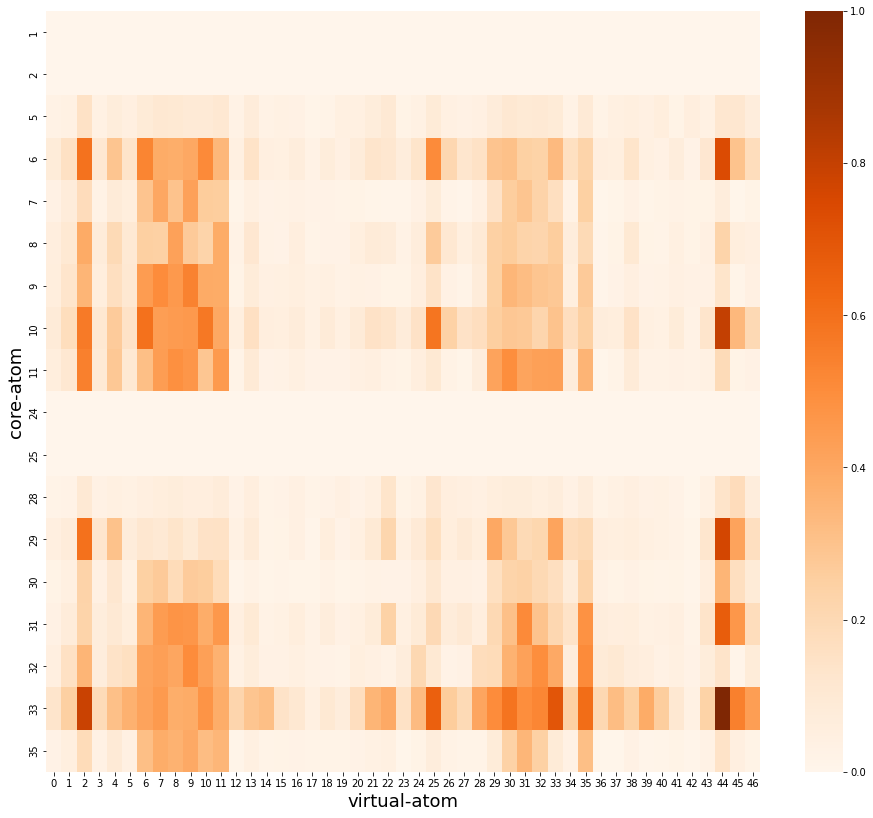

In [55]:
fig, ax = plt.subplots(figsize=(16,14)) 

test = (heatmapw_48_AB - heatmapw_48_AB.min().min())/(heatmapw_48_AB.max().max() - heatmapw_48_AB.min().min())

sns.heatmap(test, annot=False, cmap='Oranges', vmin=0, vmax=1, ax=ax)
fig.savefig('FGLw_FY_48.svg', format="svg")

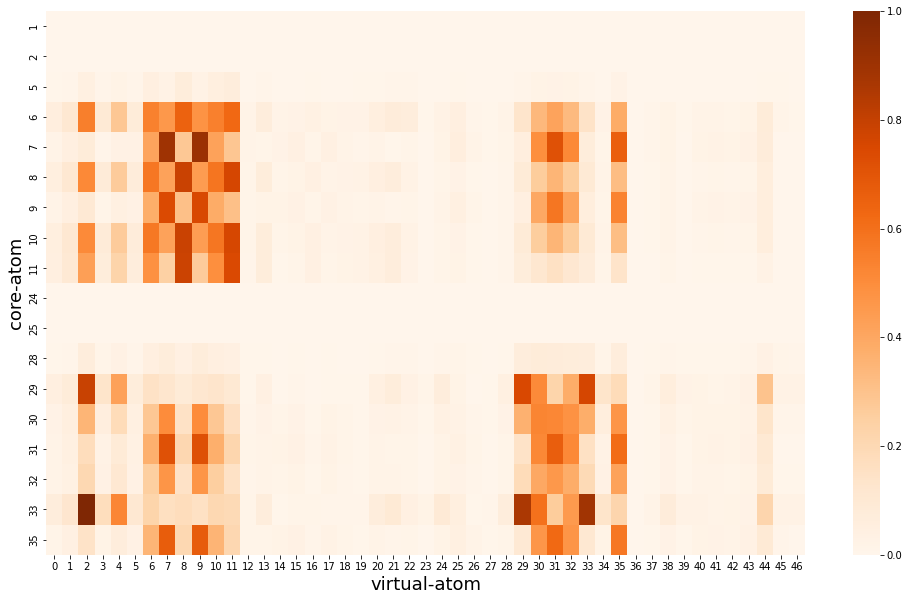

In [56]:
fig, ax = plt.subplots(figsize=(17,10)) 

test = (heatmap_60_AB - heatmap_60_AB.min().min())/(heatmap_60_AB.max().max() - heatmap_60_AB.min().min())

sns.heatmap(test, annot=False, cmap='Oranges', vmin=0, vmax=1, ax=ax)
fig.savefig('FGL_FY_60.svg', format="svg")

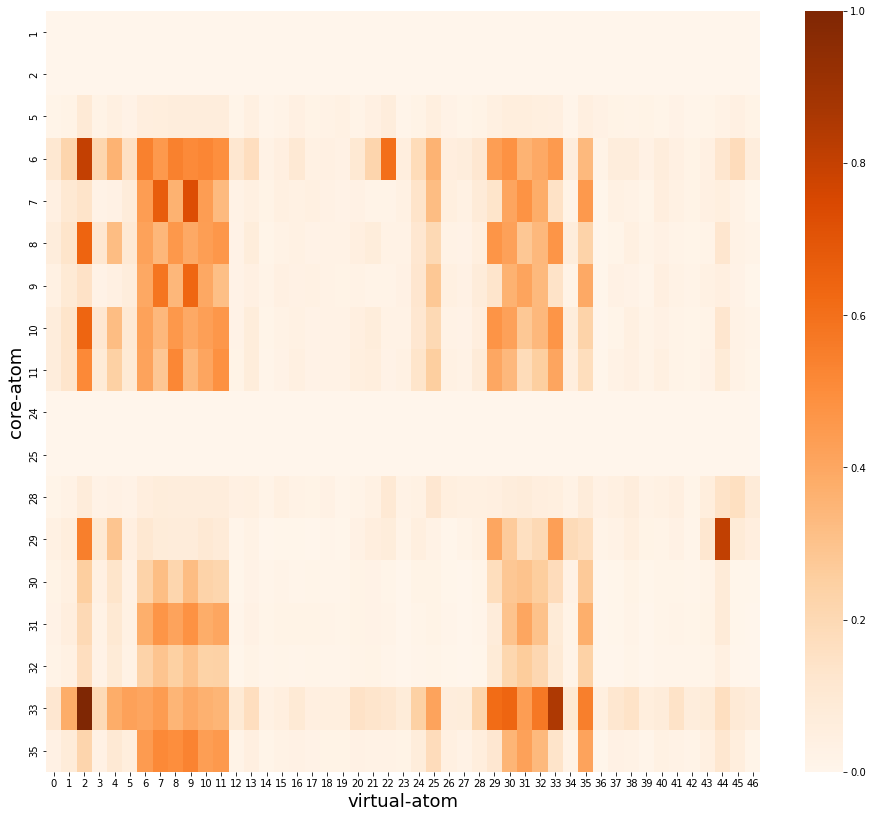

In [57]:
fig, ax = plt.subplots(figsize=(16,14)) 

test = (heatmapw_60_AB - heatmapw_60_AB.min().min())/(heatmapw_60_AB.max().max() - heatmapw_60_AB.min().min())

sns.heatmap(test, annot=False, cmap='Oranges', vmin=0, vmax=1, ax=ax)
fig.savefig('FGLw_FY_60.svg', format="svg")

<AxesSubplot:xlabel='virtual-atom', ylabel='core-atom'>

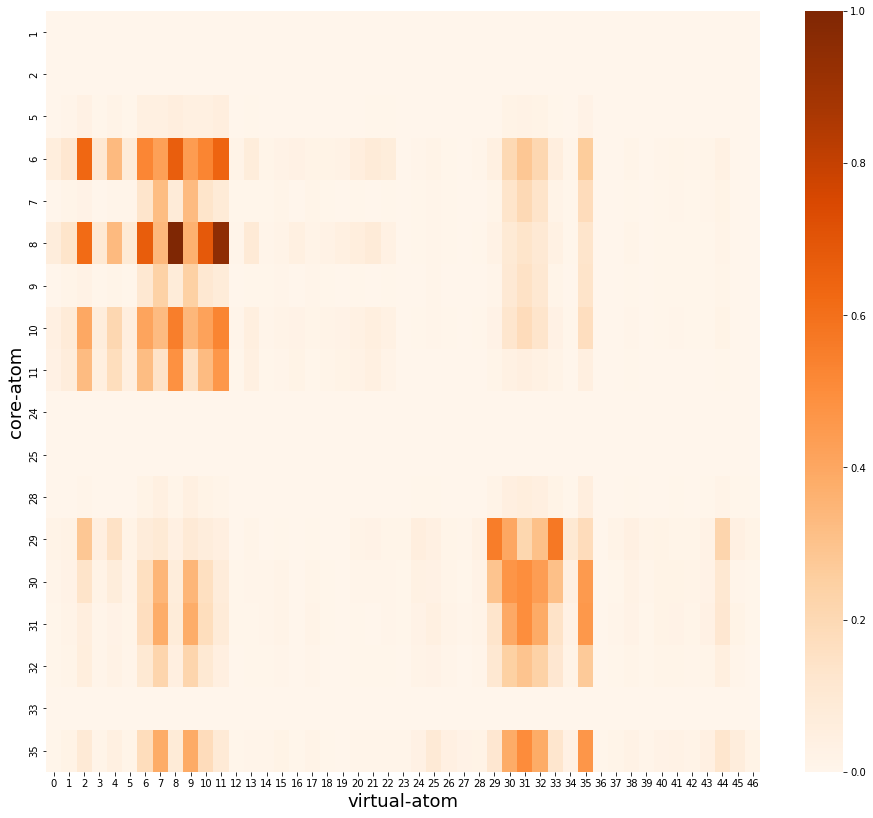

In [58]:
fig, ax = plt.subplots(figsize=(16,14)) 

test = (heatmap_65_AB - heatmap_65_AB.min().min())/(heatmap_65_AB.max().max() - heatmap_65_AB.min().min())

sns.heatmap(test, annot=False, cmap='Oranges', vmin=0, vmax=1, ax=ax)

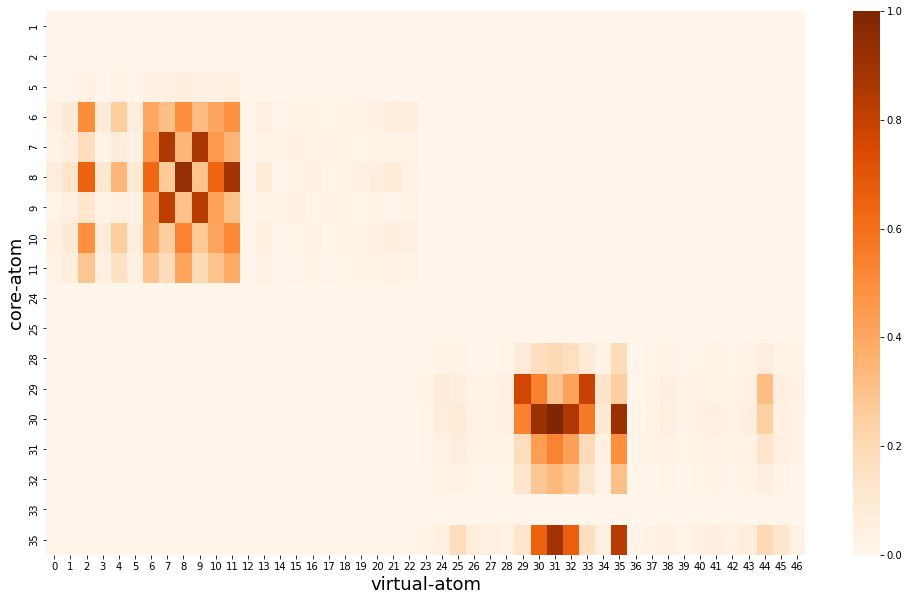

In [59]:
fig, ax = plt.subplots(figsize=(17,10)) 

test = (heatmap_80_AB - heatmap_80_AB.min().min())/(heatmap_80_AB.max().max() - heatmap_80_AB.min().min())

sns.heatmap(test, annot=False, cmap='Oranges', vmin=0, vmax=1, ax=ax)
fig.savefig('FGL_FY_80.svg', format="svg")

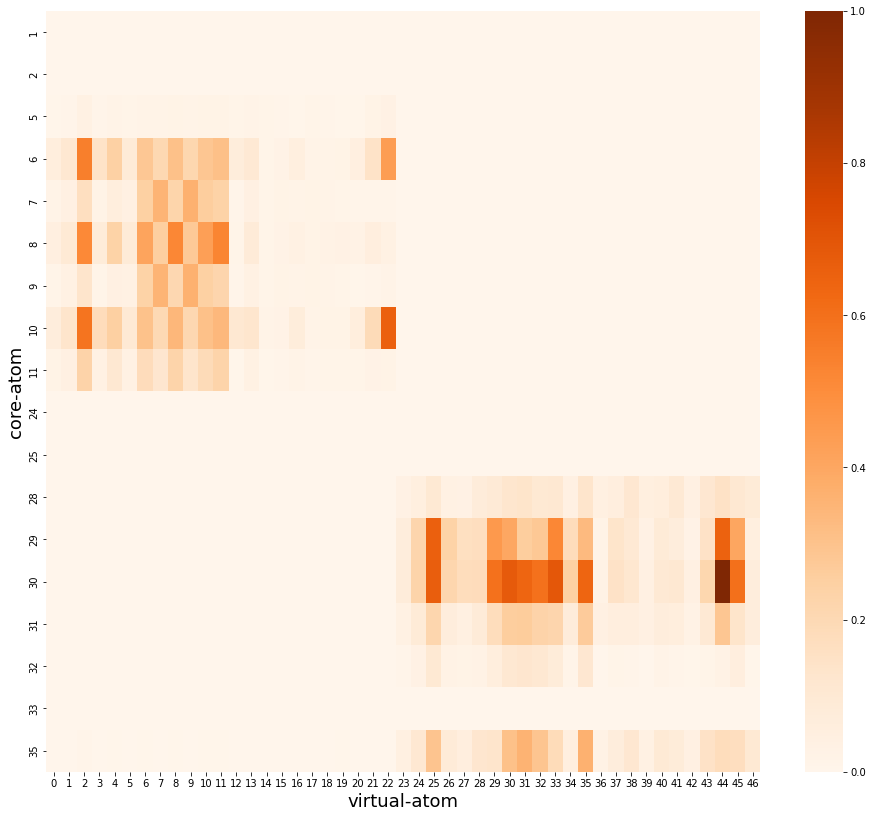

In [60]:
fig, ax = plt.subplots(figsize=(17,10)) 

test = (heatmapw_80_AB - heatmapw_80_AB.min().min())/(heatmapw_80_AB.max().max() - heatmapw_80_AB.min().min())

sns.heatmap(test, annot=False, cmap='Oranges', vmin=0, vmax=1, ax=ax)
fig.savefig('FGLw_FY_80.svg', format="svg")

<AxesSubplot:xlabel='virtual-atom', ylabel='core-atom'>

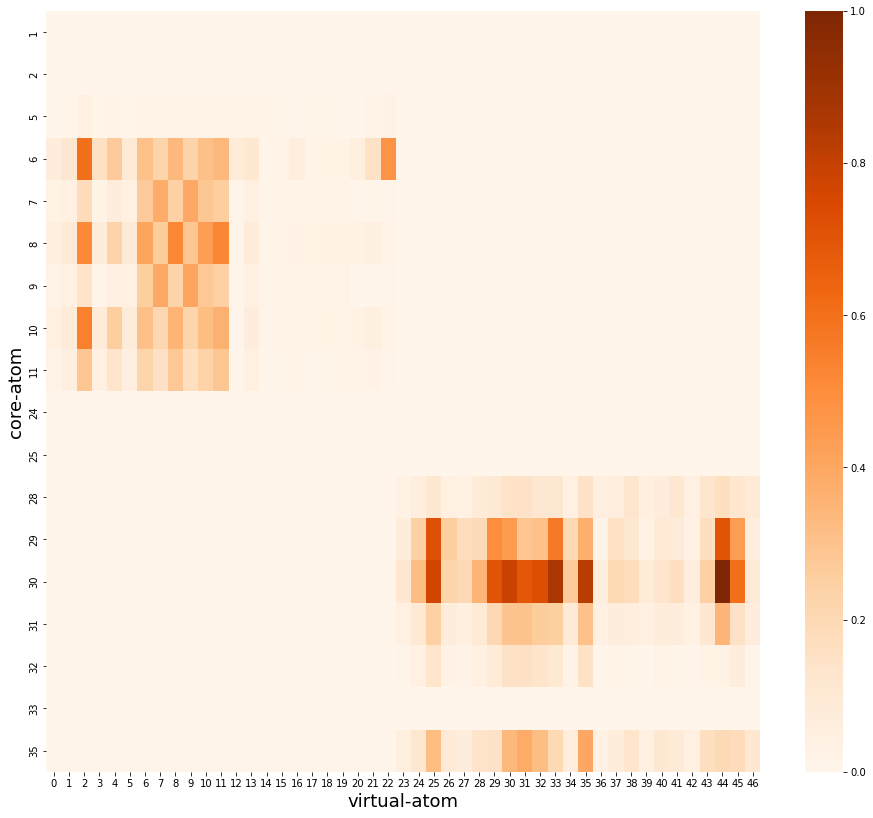

In [61]:
fig, ax = plt.subplots(figsize=(16,14)) 

test = (heatmapw_100_AB - heatmapw_100_AB.min().min())/(heatmapw_100_AB.max().max() - heatmapw_100_AB.min().min())

sns.heatmap(test, annot=False, cmap='Oranges', vmin=0, vmax=1, ax=ax)

In [62]:
for ii in list_suf:
        globals()['df_%s_fosce' % str(ii)] = \
        ts_psb_acore_bvirt(globals()['resa_mocore_%s_AB' % str(ii)].T[2:].T,\
                           globals()['resb_movirt_%s_AB_raw' % str(ii)].T[2:].T,\
                           globals()['corevirt_mo_fosce_%s_AB_raw' % str(ii)])


In [63]:
atomAi, atomAf, atomBi, atomBf

(0, 22, 23, 46)

In [64]:
df_45_fosce.columns.values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46])

In [65]:
df_45_fosce.loc[[i for i in df_45_fosce.index.values if i <= atomAf],\
               [i for i in df_45_fosce.columns.values if i >= atomBi]]

virtual-atom,23,24,25,26,27,28,29,30,31,32,...,37,38,39,40,41,42,43,44,45,46
core-atom,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.002046,0.004004,0.014328,0.00663,0.004315,0.005286,0.013637,0.028078,0.0275,0.025182,...,0.003275,0.008265,0.003287,0.004784,0.0042,0.002791,0.006454,0.024454,0.012777,0.005326
6,0.005407,0.011608,0.050542,0.020837,0.011286,0.014545,0.046678,0.154366,0.129282,0.139025,...,0.004317,0.018807,0.008759,0.009732,0.013848,0.007065,0.018243,0.141213,0.024527,0.01293
7,0.00051,0.003074,0.008761,0.003112,0.000864,0.004039,0.025834,0.076494,0.110074,0.07655,...,0.000935,0.007828,0.002162,0.003878,0.006391,0.003563,0.005417,0.024012,0.000381,0.000548
8,0.003162,0.015534,0.053823,0.020531,0.005572,0.024519,0.105387,0.279231,0.497793,0.299611,...,0.004298,0.049903,0.003966,0.013918,0.030838,0.013964,0.031912,0.133047,0.00537,0.00454
9,0.001149,0.009486,0.028731,0.011892,0.002773,0.013704,0.080245,0.232339,0.399673,0.24549,...,0.002297,0.031441,0.00386,0.010487,0.022414,0.010776,0.020257,0.075106,0.002205,0.001773
10,0.010422,0.019316,0.07751,0.032496,0.019826,0.023642,0.068052,0.167005,0.146811,0.150185,...,0.008759,0.0278,0.013013,0.013735,0.022944,0.012674,0.028931,0.180468,0.050317,0.026432
11,0.002914,0.010025,0.041335,0.015629,0.00551,0.015277,0.050567,0.14681,0.230927,0.152502,...,0.00335,0.026627,0.003623,0.008155,0.01699,0.007721,0.019478,0.105933,0.006176,0.004273


#### Calculating the 4 terms of the transition intensities

In [66]:
inter_fosce = []
all_fosce = []
AB_inter_fosce = []
BA_inter_fosce = []
AA_inter_fosce = []
BB_inter_fosce = []

for ii in list_suf:
    inter_fosce.append(globals()['df_%s_fosce' % str(ii)].loc[[i for i in globals()['df_%s_fosce' % str(ii)].index.values if i > atomAf],\
               [i for i in globals()['df_%s_fosce' % str(ii)].columns.values if i < atomBi]].sum().sum() + \
    globals()['df_%s_fosce' % str(ii)].loc[[i for i in globals()['df_%s_fosce' % str(ii)].index.values if i <= atomAf],\
               [i for i in globals()['df_%s_fosce' % str(ii)].columns.values if i >= atomBi]].sum().sum())
    AB_inter_fosce.append(globals()['df_%s_fosce' % str(ii)].loc[[i for i in globals()['df_%s_fosce' % str(ii)].index.values if i <= atomAf],\
               [i for i in globals()['df_%s_fosce' % str(ii)].columns.values if i >= atomBi]].sum().sum())
    BA_inter_fosce.append(globals()['df_%s_fosce' % str(ii)].loc[[i for i in globals()['df_%s_fosce' % str(ii)].index.values if i >= atomBi],\
               [i for i in globals()['df_%s_fosce' % str(ii)].columns.values if i <= atomAf]].sum().sum())
    AA_inter_fosce.append(globals()['df_%s_fosce' % str(ii)].loc[[i for i in globals()['df_%s_fosce' % str(ii)].index.values if i <= atomAf],\
               [i for i in globals()['df_%s_fosce' % str(ii)].columns.values if i <= atomAf]].sum().sum())
    BB_inter_fosce.append(globals()['df_%s_fosce' % str(ii)].loc[[i for i in globals()['df_%s_fosce' % str(ii)].index.values if i >= atomBi],\
               [i for i in globals()['df_%s_fosce' % str(ii)].columns.values if i >= atomBi]].sum().sum())
                       
    all_fosce.append(globals()['df_%s_fosce' % str(ii)].sum().sum())
intra_fosce = [all_fosce[i] - inter_fosce[i] for i in range(len(inter_fosce))]

In [67]:
max(inter_fosce), max(intra_fosce), max(all_fosce)

(22.147341668207414, 46.15203957466036, 48.70744907290185)

#### including dipole moments u_aa, u_bb, u_ab and u_ba

In [68]:
dfftotal_fosce = pd.DataFrame({'Distance': [ii/10 for ii in list_suf],\
                               'inter_fosce': [i for i in inter_fosce],\
                               'intra_fosce': [i for i in intra_fosce],\
                               'all_fosce': [i for i in all_fosce],\
                               'inter_rel_fosce': [i/max(inter_fosce) for i in inter_fosce],\
                               'intra_rel_fosce': [i/max(intra_fosce) for i in intra_fosce],\
                               'all_rel_fosce': [i/max(all_fosce) for i in all_fosce],\
                               'u_aa': [(i)**0.5 for i in AA_inter_fosce],\
                               'u_bb': [(i)**0.5 for i in BB_inter_fosce],\
                               'u_ab': [(i)**0.5 for i in AB_inter_fosce],\
                               'u_ba': [(i)**0.5 for i in BA_inter_fosce]
                              })

#### H_ab and H_ba calculation

In [70]:
delta_e_1state = pd.read_csv('deltaEAB_FY.csv', delimiter=',')#, index_col='num-1'
dfftotal_fosce.insert(len(dfftotal_fosce.columns), '0_1state_Energy', delta_e_1state["Energy"].values)

In [71]:
#(dfftotal_fosce["u_ab"]/((dfftotal_fosce["u_aa"]-dfftotal_fosce["u_bb"])**2 + 4*(dfftotal_fosce["u_ab"]**2))**(0.5)).values
dfftotal_fosce.insert(len(dfftotal_fosce.columns), 'u_abba',\
                      ((dfftotal_fosce["u_ab"]**2+dfftotal_fosce["u_ba"]**2)**0.5).values)
#dfftotal_fosce.insert(len(dfftotal_fosce.columns), 'Hab',\
#                      ((dfftotal_fosce["u_abba"]*dfftotal_fosce["0_1state_Energy"])/((dfftotal_fosce["u_aa"]-dfftotal_fosce["u_bb"])**2 + 4*(dfftotal_fosce["u_abba"]**2))**(0.5)).values)
dfftotal_fosce.insert(len(dfftotal_fosce.columns), 'Hab',\
                      ((dfftotal_fosce["u_abba"]*dfftotal_fosce["0_1state_Energy"])/((dfftotal_fosce["u_aa"]-dfftotal_fosce["u_bb"])**2 + 4*(dfftotal_fosce["u_abba"]**2))**0.5).values)
dfftotal_fosce.insert(len(dfftotal_fosce.columns), 'Hab^2',\
                      (dfftotal_fosce["Hab"]**2).values)

In [72]:
#(dfftotal_fosce["Hab"]*dfftotal_fosce["0_1state_Energy"])**2

In [73]:
h_bar=1.054571817*(10**-34) #Js
h_bar_ev=6.582119569*(10**-16) #eVs
kb = 1.380649*(10**-21) #J/K
kb_ev = 8.617333262*(10**-5) #eV/K
t = 293 #K

k_et = ((2*math.pi)/h_bar_ev)*((4*math.pi*kb_ev*t)**-0.5) #

In [74]:
from math import e, log
ln = np.log
ln(e)

1.0

In [75]:
dfftotal_fosce

,Distance,inter_fosce,intra_fosce,all_fosce,inter_rel_fosce,intra_rel_fosce,all_rel_fosce,u_aa,u_bb,u_ab,u_ba,0_1state_Energy,u_abba,Hab,Hab^2
0,2.5,15.811635,16.028700,31.840335,7.139292e-01,0.347302,0.653706,3.035474,2.610479,2.901975,2.718488,280.05,3.976385,139.825484,19551.166105
1,2.6,16.097037,16.488014,32.585051,7.268158e-01,0.357254,0.668995,3.147913,2.564889,2.947409,2.722098,280.19,4.012111,139.726664,19523.540761
2,2.7,16.346659,16.933081,33.279740,7.380867e-01,0.366898,0.683258,3.232484,2.546396,2.966053,2.747579,280.30,4.043100,139.648239,19501.630736
3,2.8,16.115904,17.727001,33.842905,7.276676e-01,0.384100,0.694820,3.622702,2.145468,3.229266,2.384900,280.39,4.014462,137.880657,19011.075630
4,2.9,17.825560,18.625099,36.450659,8.048623e-01,0.403560,0.748359,3.326912,2.748956,2.968876,3.001889,280.46,4.222033,139.902679,19572.759520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,9.0,0.004151,46.036660,46.040810,1.874104e-04,0.997500,0.945252,4.980900,4.607309,0.000000,0.064425,281.12,0.064425,45.829627,2100.354707
58,9.5,0.000004,46.121536,46.121541,2.005882e-07,0.999339,0.946909,4.983238,4.613987,0.000000,0.002108,281.13,0.002108,1.604613,2.574783
59,10.0,0.000002,46.140848,46.140851,1.023962e-07,0.999758,0.947306,4.984106,4.615142,0.000000,0.001506,281.13,0.001506,1.147392,1.316509
60,10.5,0.000000,46.050159,46.050159,0.000000e+00,0.997793,0.945444,4.990911,4.597931,0.000000,0.000000,281.14,0.000000,0.000000,0.000000


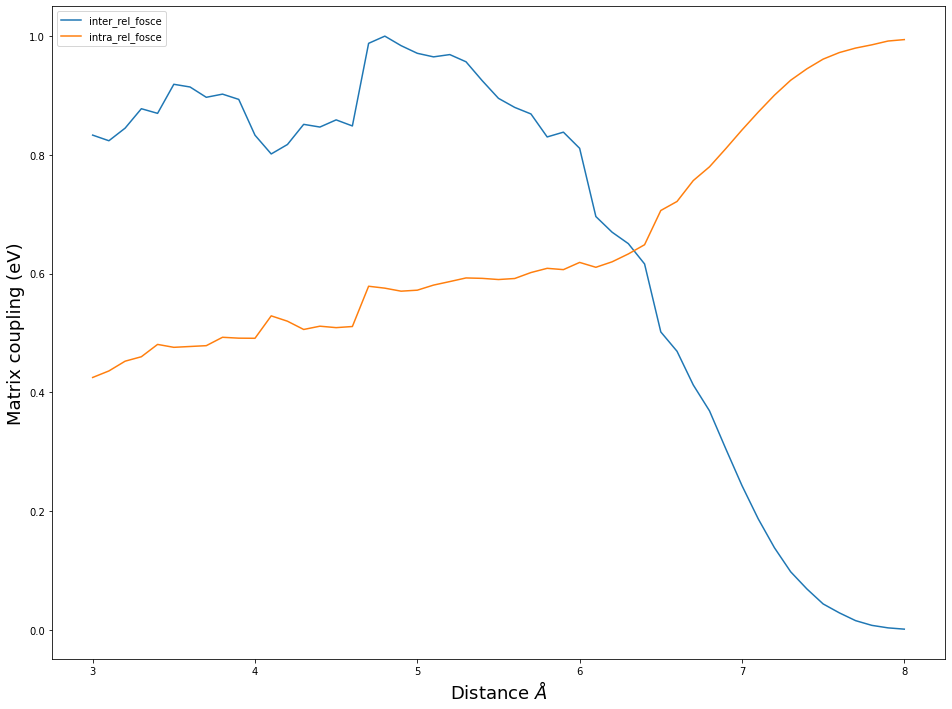

In [76]:
ax = dfftotal_fosce.loc[5:55,:].plot(x="Distance", y=["inter_rel_fosce","intra_rel_fosce"],
        kind="line", figsize=(16, 12))
ax.set_xlabel('Distance $\AA$')
ax.set_ylabel('Matrix coupling (eV)')
plt.rc('font', size=26)

plt.savefig('new2_intra_inter.svg', format="svg")
plt.show()

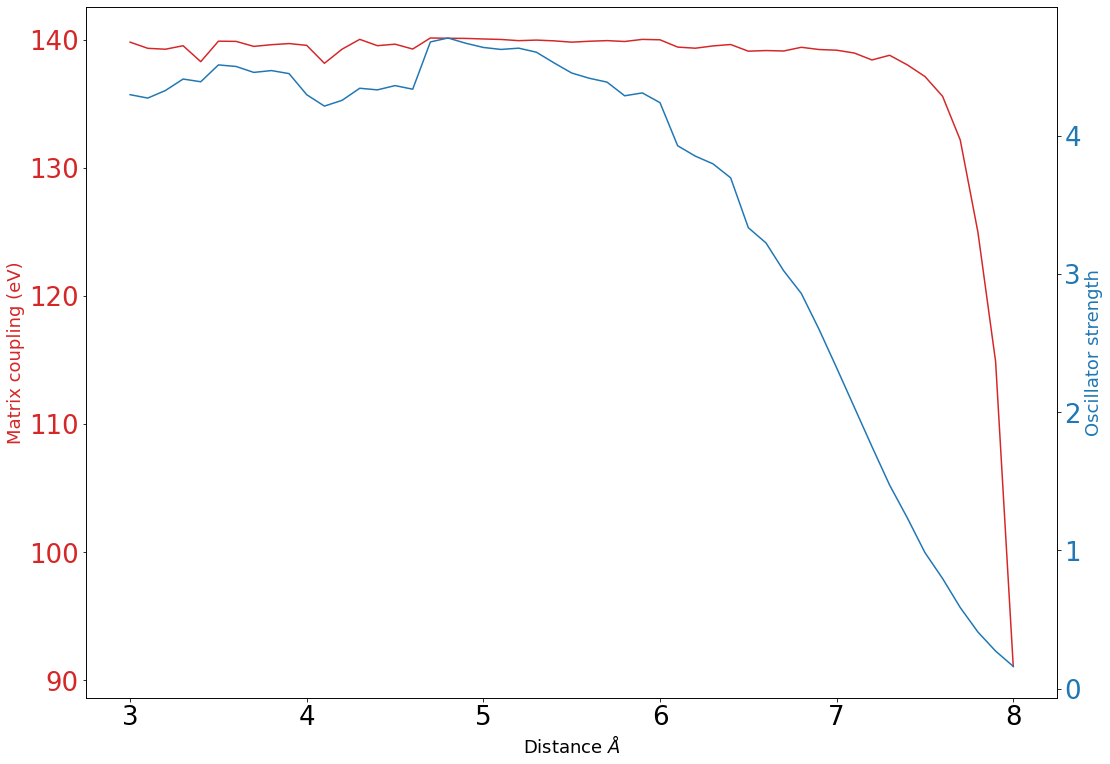

In [77]:
x_c = dfftotal_fosce.loc[5:55,:]["Distance"].values
y1_c = dfftotal_fosce.loc[5:55,:]["Hab"].values
y2_c = (dfftotal_fosce.loc[5:55,:]["inter_fosce"]**0.5).values
#y1_c = dfftotal_fosce.loc[5:55,:]["Hab^2"].values
#y2_c = dfftotal_fosce.loc[5:55,:]["inter_fosce"].values

fig, ax1 = plt.subplots(figsize=(16, 11.2))

color = 'tab:red'
ax1.set_xlabel('Distance $\AA$')
ax1.set_ylabel('Matrix coupling (eV)', color=color)
ax1.plot(x_c, y1_c, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Oscillator strength', color=color)  # we already handled the x-label with ax1
ax2.plot(x_c, y2_c, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.rc('font', size=26)
#plt.savefig('hab_fosc_ab.svg', format="svg")
plt.show()

In [78]:
dfftotal_fosce.loc[5:55,:]['Hab'].values, dfftotal_fosce.loc[5:55,:]['Distance'].values

(array([139.79414793, 139.31319767, 139.24168456, 139.51470539,
        138.27060258, 139.8694821 , 139.85367988, 139.46313939,
        139.59425778, 139.68477911, 139.54225853, 138.14430327,
        139.2453766 , 140.01195352, 139.51867214, 139.63552543,
        139.25606482, 140.11963353, 140.09716007, 140.08505106,
        140.04174117, 140.00444435, 139.9101814 , 139.95497992,
        139.89569213, 139.79360242, 139.86445123, 139.91407785,
        139.84586683, 140.01032305, 139.97742661, 139.40888356,
        139.32100348, 139.49898868, 139.60936236, 139.08899745,
        139.13876858, 139.10333056, 139.3928708 , 139.21974458,
        139.16514526, 138.94579327, 138.40446368, 138.76992171,
        138.02189326, 137.1128628 , 135.56312701, 132.15038178,
        124.95322921, 114.86484012,  91.0639078 ]),
 array([3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2,
        4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5,
        5.6, 5.7, 5.8, 5.9, 6. , 6

In [79]:
#dfftotal_fosce.set_index('Distance')

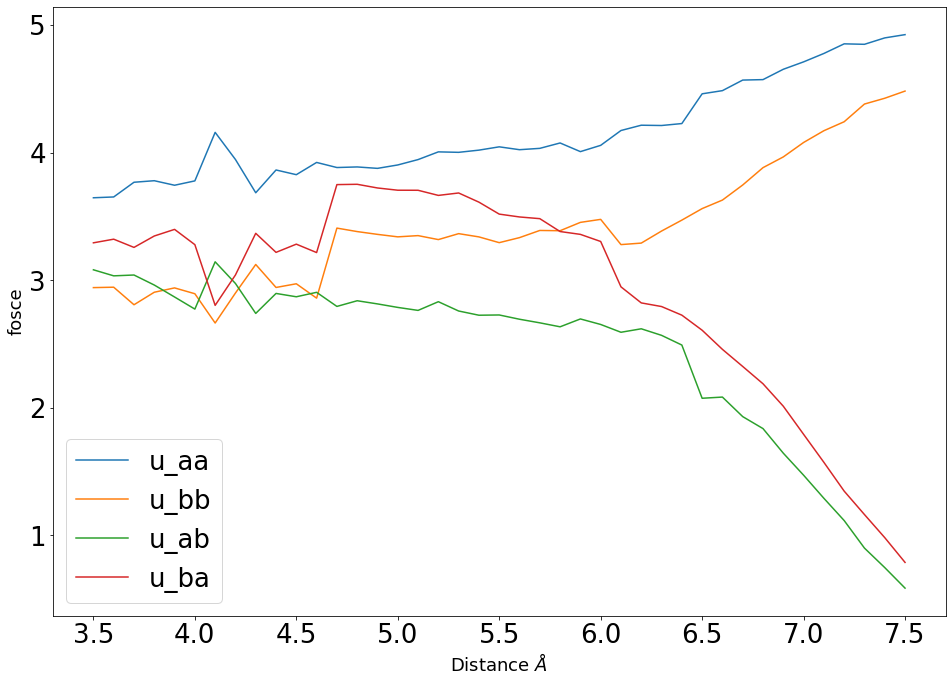

In [80]:
ax = dfftotal_fosce.loc[10:50,:].plot(x="Distance", y=["u_aa","u_bb","u_ab", "u_ba"],
        kind="line", figsize=(16, 11.2))
ax.set_xlabel('Distance $\AA$')
ax.set_ylabel('fosce')
plt.rc('font', size=26)

#plt.savefig('new_u_intra_inter.svg', format="svg")
plt.show()

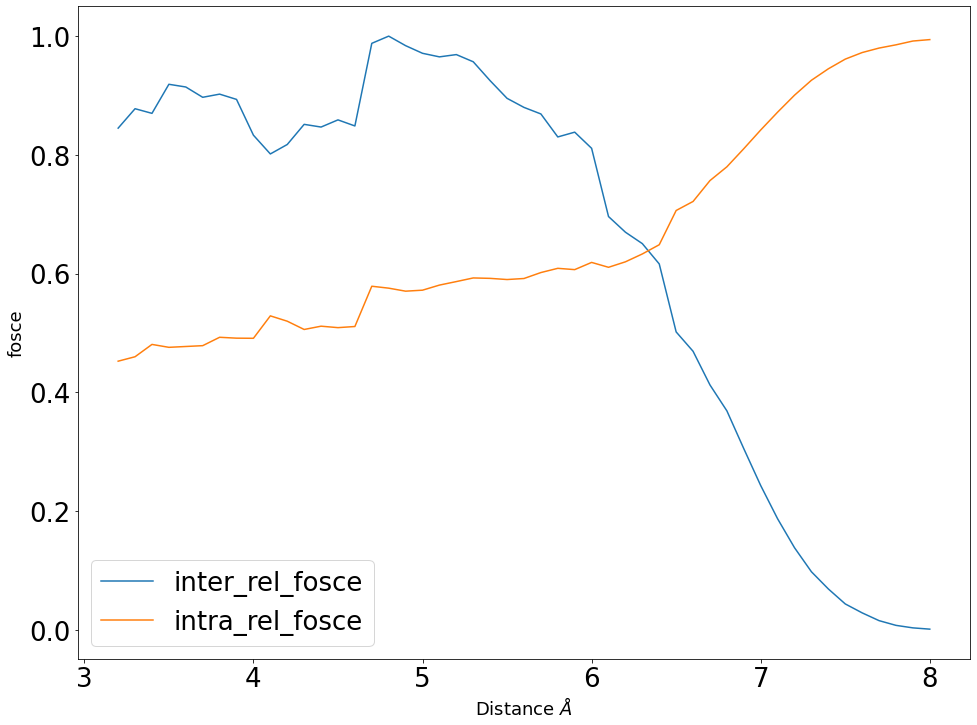

In [81]:
#intersection at 4.24-4.25 [18:20] index range
ax = dfftotal_fosce.loc[7:55,:].plot(x="Distance", y=["inter_rel_fosce", "intra_rel_fosce"],
        kind="line", figsize=(16, 12))
ax.set_xlabel('Distance $\AA$')
ax.set_ylabel('fosce')
plt.rc('font', size=26)

plt.savefig('new_intra_inter_35-80.svg', format="svg")
plt.show()

In [82]:
ax.set_xlabel('Distance $\AA$')
ax.set_ylabel('Binding energy (Kcal/mol)')
plt.rc('font', size=26)
plt.savefig('BE_comp.svg', format="svg")

<Figure size 432x288 with 0 Axes>

<AxesSubplot:xlabel='Distance'>

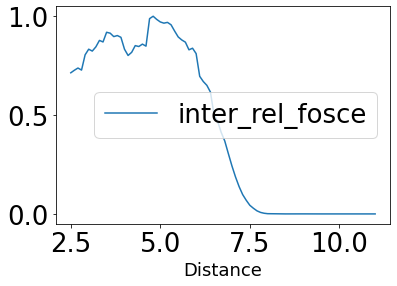

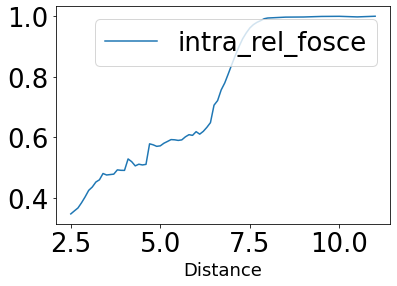

In [83]:
dfftotal_fosce.plot(x='Distance', y='inter_rel_fosce', style='-')
dfftotal_fosce.plot(x='Distance', y='intra_rel_fosce', style='-')

<AxesSubplot:xlabel='Distance'>

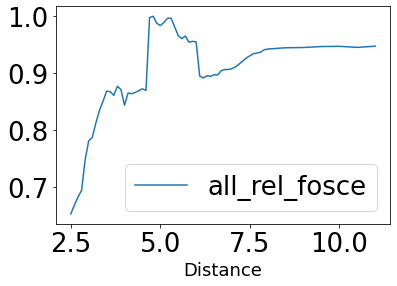

In [84]:
dfftotal_fosce.plot(x='Distance', y='all_rel_fosce', style='-')

In [85]:
#inter_fosce, inter_intra_fosce

### Data from FMO - charge transfer

In [86]:
def derivate(serie, colval, coldt):
    df1 = (serie.loc[:,colval].diff() / serie.loc[:,coldt].diff()).fillna(0)#.dropna()
    #df1.index = serie.index[0:-1]
    return pd.DataFrame({'dE/dr': [i for i in df1]})
#serie.index.to_series().diff()

In [87]:
#FY_BE_FMO.csv

In [88]:
BE_FMO_raw = pd.read_csv('FY_BE_FMO.csv', delimiter=',')#, index_col='num-1'

In [89]:
derivate(BE_FMO_raw,"E(ct)_Kcal/mol","Distance")#.values

,dE/dr
0,0.00
1,283.98
2,160.94
3,94.37
4,56.66
...,...
57,0.00
58,0.00
59,0.00
60,0.00


In [90]:
BE_FMO_raw.insert(len(BE_FMO_raw.columns), 'dE(CT)/dx', derivate(BE_FMO_raw,"E(ct)_Kcal/mol","Distance").values)

In [91]:
BE_FMO_raw[7:56]

,Distance,sp_energy_Eh,sp_enery_kcal/mol,BE_(kcal/mol),E(int)_Kcal/mol,E(ES)_Kcal/mol,E(EX)_Kcal/mol,E(ct)_Kcal/mol,E(di)_Kcal/mol,dE(CT)/dx
7,3.2,-1186.539480,-744553.5239,3.170844,2.059,-9.332,34.056,-3.813,-18.852,14.12
8,3.3,-1186.544333,-744556.5690,0.125711,-0.481,-5.841,24.245,-2.866,-16.019,9.47
9,3.4,-1186.547408,-744558.4985,-1.803756,-2.110,-3.506,17.243,-2.207,-13.640,6.59
10,3.5,-1186.549224,-744559.6381,-2.943341,-3.077,-1.952,12.248,-1.734,-11.639,4.73
11,3.6,-1186.550231,-744560.2703,-3.575513,-3.579,-0.926,8.689,-1.390,-9.952,3.44
12,3.7,-1186.550682,-744560.5527,-3.857971,-3.766,-0.258,6.155,-1.139,-8.525,2.51
13,3.8,-1186.550752,-744560.5969,-3.902115,-3.749,0.168,4.356,-0.959,-7.314,1.80
14,3.9,-1186.550545,-744560.4672,-3.772446,-3.605,0.432,3.079,-0.833,-6.284,1.26
15,4.0,-1186.550161,-744560.2258,-3.531060,-3.389,0.586,2.175,-0.746,-5.405,0.87
16,4.1,-1186.549723,-744559.9510,-3.256301,-3.135,0.669,1.535,-0.684,-4.654,0.62


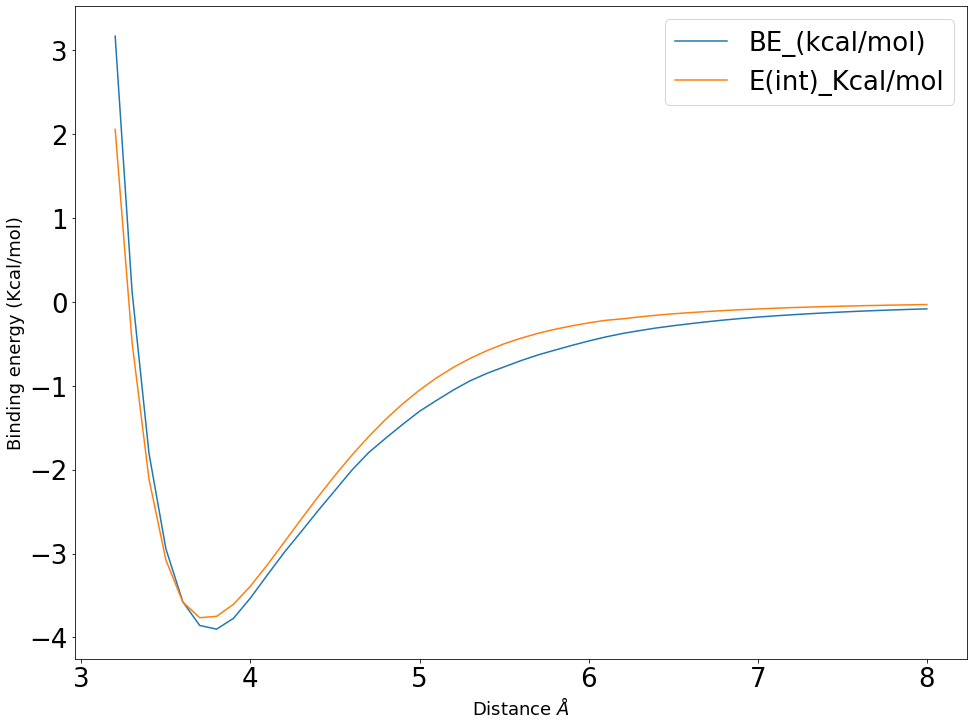

In [92]:
ax = BE_FMO_raw[7:56].plot(x="Distance", y=["BE_(kcal/mol)", "E(int)_Kcal/mol"],
        kind="line", figsize=(16, 12))
ax.set_xlabel('Distance $\AA$')
ax.set_ylabel('Binding energy (Kcal/mol)')
plt.rc('font', size=26)
plt.savefig('BE_comp_35-80.svg', format="svg")
plt.show()

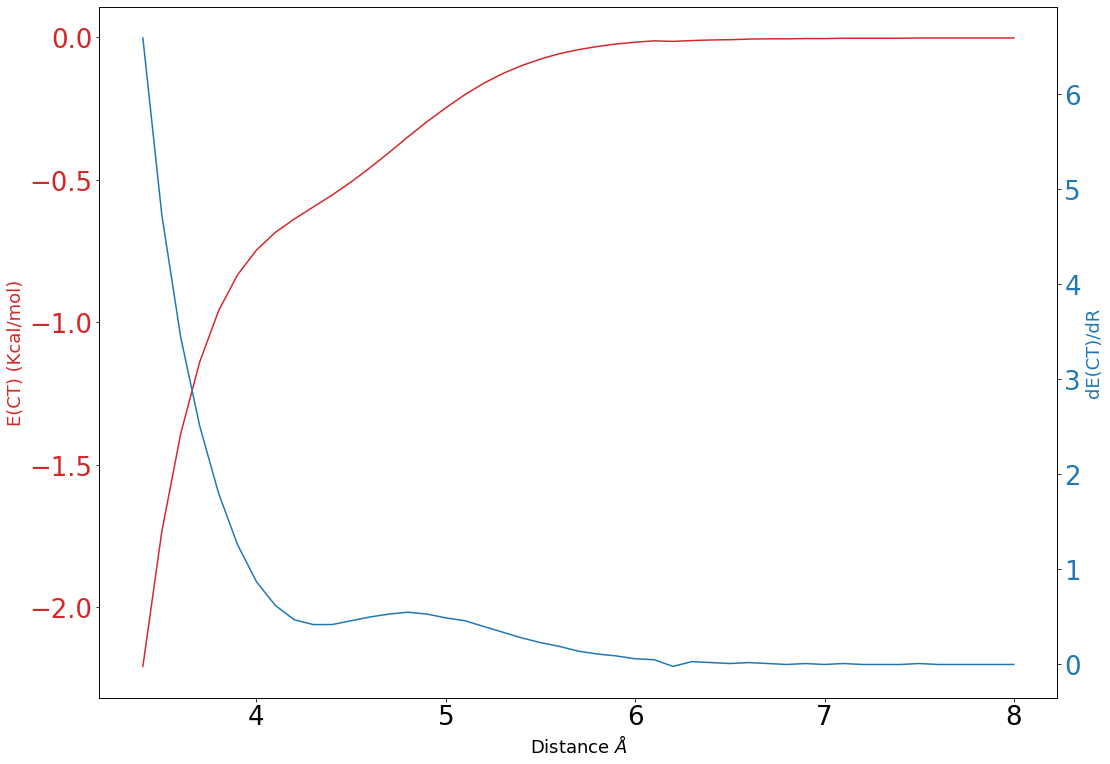

In [93]:
x = BE_FMO_raw[9:56].loc[:,["Distance"]].T.values[0]
y1 = BE_FMO_raw[9:56].loc[:,["E(ct)_Kcal/mol"]].T.values[0]
y2 = BE_FMO_raw[9:56].loc[:,["dE(CT)/dx"]].T.values[0]

fig, ax1 = plt.subplots(figsize=(16, 11.2))

color = 'tab:red'
ax1.set_xlabel('Distance $\AA$')
ax1.set_ylabel('E(CT) (Kcal/mol)', color=color)
ax1.plot(x, y1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('dE(CT)/dR', color=color)  # we already handled the x-label with ax1
ax2.plot(x, y2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.rc('font', size=26)
#plt.savefig('CT_dCT.svg', format="svg")
plt.show()

In [94]:
BE_FMO_raw[7:56].loc[:,["Distance"]].T.values[0], \
BE_FMO_raw[7:56].loc[:,["E(ct)_Kcal/mol"]].T.values[0]

(array([3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4,
        4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7,
        5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. ,
        7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. ]),
 array([-3.813e+00, -2.866e+00, -2.207e+00, -1.734e+00, -1.390e+00,
        -1.139e+00, -9.590e-01, -8.330e-01, -7.460e-01, -6.840e-01,
        -6.370e-01, -5.950e-01, -5.530e-01, -5.070e-01, -4.570e-01,
        -4.040e-01, -3.490e-01, -2.960e-01, -2.470e-01, -2.010e-01,
        -1.610e-01, -1.270e-01, -9.900e-02, -7.600e-02, -5.700e-02,
        -4.300e-02, -3.200e-02, -2.300e-02, -1.700e-02, -1.200e-02,
        -1.400e-02, -1.100e-02, -9.000e-03, -8.000e-03, -6.000e-03,
        -5.000e-03, -5.000e-03, -4.000e-03, -4.000e-03, -3.000e-03,
        -3.000e-03, -3.000e-03, -3.000e-03, -2.000e-03, -2.000e-03,
        -2.000e-03, -2.000e-03, -2.000e-03, -2.000e-03]))

In [95]:
dfftotal_fosce.loc[24:45,:]['Distance'].values, \
dfftotal_fosce.loc[24:45,:]['Hab'].values

(array([4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1,
        6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. ]),
 array([140.08505106, 140.04174117, 140.00444435, 139.9101814 ,
        139.95497992, 139.89569213, 139.79360242, 139.86445123,
        139.91407785, 139.84586683, 140.01032305, 139.97742661,
        139.40888356, 139.32100348, 139.49898868, 139.60936236,
        139.08899745, 139.13876858, 139.10333056, 139.3928708 ,
        139.21974458, 139.16514526]))

## Curves for H_ab, H_ab only for the decay process (5.0 - 7.0 Angstroms) and CT (3.2 - 6.2 Angstroms)

In [96]:
from scipy.optimize import curve_fit

def invsigmoid(x, x0, l, k, b):
    return (-l / (1 + np.exp(-k*(x-x0)))) + b

def exp_trend(x, a, b, c):
    return (a * np.exp(-b*x)) + c

def inv_exp(x, a, b, c):
    return (-a * np.exp(b*x)) + c

In [97]:
x_dist = dfftotal_fosce.loc[7:56,:]['Distance'].values
y_hab = (dfftotal_fosce.loc[7:56,:]['inter_fosce']).values#Hab

#x_dist_dec = dfftotal_fosce.loc[21:46,:]['Distance'].values
#y_hab_dec = dfftotal_fosce.loc[21:46,:]['inter_fosce'].values#Hab

p0 = [np.median(x_dist),max(y_hab),1,min(y_hab)]
p1 = [1,1,0]

popt, pcov = curve_fit(invsigmoid,x_dist,y_hab,p0, maxfev=5000,method='dogbox')

In [98]:
p0, p1

([5.65, 22.147341668207414, 1, 0.0013140582974400003], [1, 1, 0])

In [99]:
popt

array([ 6.64638687, 20.34043873,  2.97990034, 20.03712907])

#### adjusted sigmoidal function to the H_ab/distance

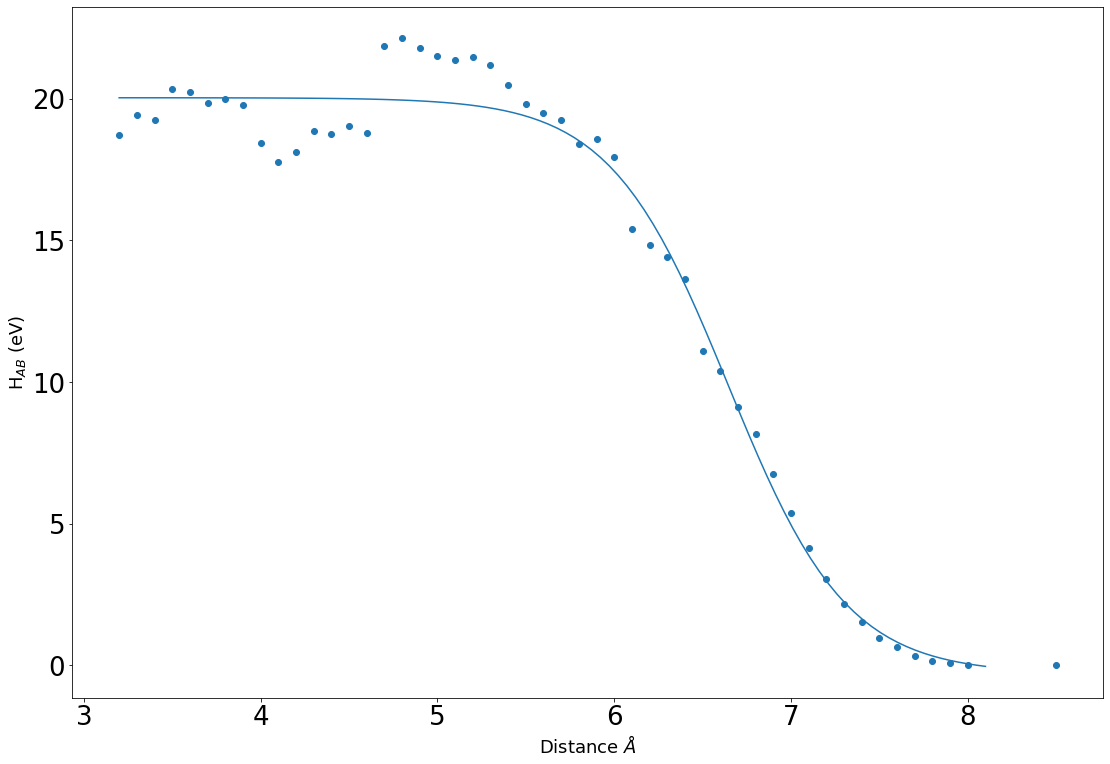

In [100]:
x_plt = dfftotal_fosce.loc[7:56,:]['Distance'].values
y_plt = (dfftotal_fosce.loc[7:56,:]['inter_fosce']).values#Hab **0.5
x_fit = np.linspace(3.2, 8.1, 100)
y_fit = invsigmoid(x_fit, *popt)

fig, ax1 = plt.subplots(figsize=(16, 11.2))

color = 'tab:blue'
ax1.set_xlabel('Distance $\AA$')
ax1.set_ylabel('H$_{AB}$ (eV)')
ax1.plot(x_plt, y_plt, 'o', color=color)
ax1.plot(x_fit, y_fit, color=color)
#ax1.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.rc('font', size=26)
plt.savefig('test_intertrans_fit.svg', format="svg")
plt.show()

#plt.plot(x_dist, y_hab, 'o', label='data')
#plt.plot(x_fit, y_fit, 'o', label='fit')

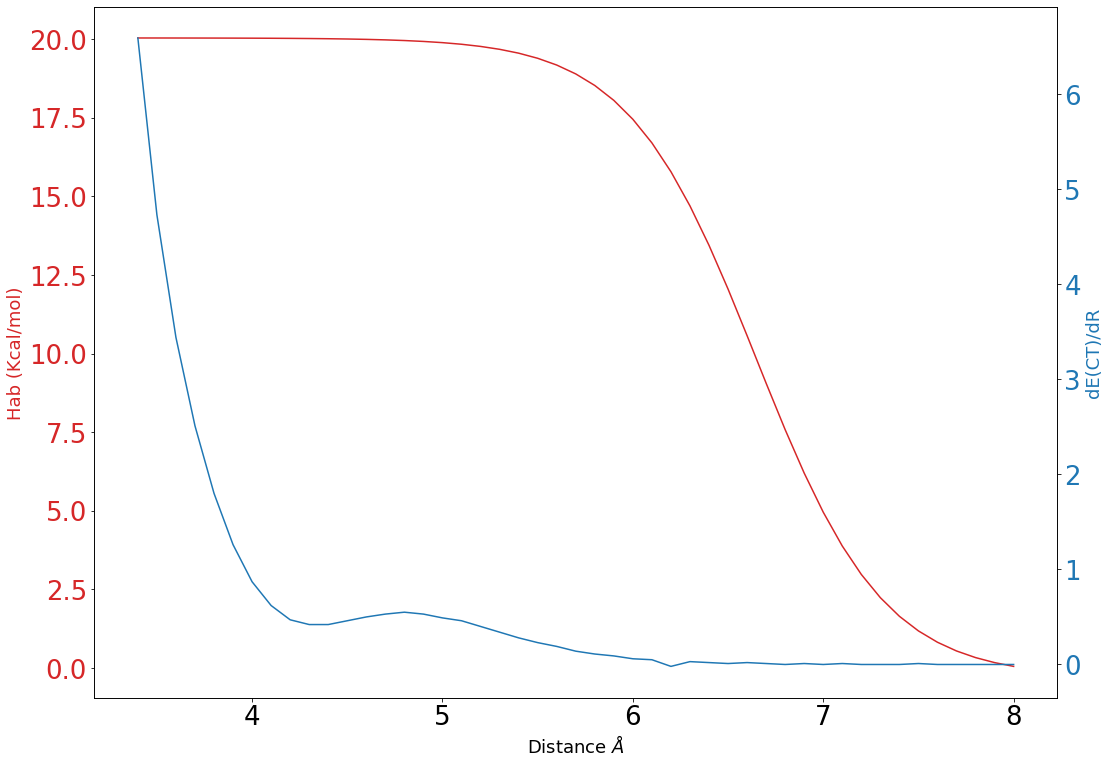

In [101]:
#x, y2, y_plt, y_fit,
x = BE_FMO_raw[9:56].loc[:,["Distance"]].T.values[0]
y1 = BE_FMO_raw[9:56].loc[:,["E(ct)_Kcal/mol"]].T.values[0]
y2 = BE_FMO_raw[9:56].loc[:,["dE(CT)/dx"]].T.values[0]
x_plt = dfftotal_fosce.loc[9:55,:]['Distance'].values
y_plt = (dfftotal_fosce.loc[9:55,:]['inter_fosce']).values#Hab **0.5
x_fit = np.linspace(3.4, 8.0, 47)#it is normally 100 points not 47
y_fit = invsigmoid(x_fit, *popt)

fig, ax1 = plt.subplots(figsize=(16, 11.2))

color = 'tab:red'
ax1.set_xlabel('Distance $\AA$')
ax1.set_ylabel('Hab (Kcal/mol)', color=color)
ax1.plot(x, y_fit, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('dE(CT)/dR', color=color)  # we already handled the x-label with ax1
ax2.plot(x, y2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.rc('font', size=26)
plt.savefig('CT_dCTvs_intertransfit.svg', format="svg")
plt.show()

### fit curve only for the decay process (5.0 - 7.0 Angstroms)

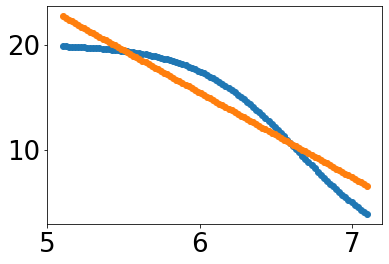

In [102]:
x_sigmoid_dec = np.linspace(5.1,7.1, 100)#4.96
y_sigmoid_dec = invsigmoid(x_sigmoid_dec, *popt)

p1 = [1,1,0.047]
popt_exp_dec, pcov_exp_dec = curve_fit(exp_trend,x_sigmoid_dec,y_sigmoid_dec,p1, maxfev=5000, method='dogbox')

plt.plot(x_sigmoid_dec, y_sigmoid_dec, 'o', label='data')
plt.plot(x_sigmoid_dec, exp_trend(x_sigmoid_dec,*popt_exp_dec), 'o', label='data')

In [103]:
popt_exp_dec

array([ 1.00357839e+06,  8.03803378e-06, -1.00351455e+06])

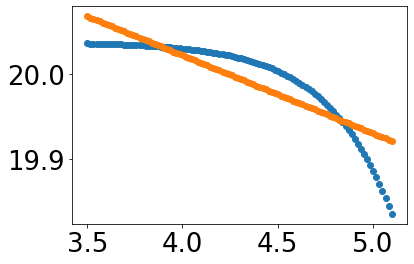

In [104]:
p2 = [1,1,3]
x_sigmoid_invdec = np.linspace(3.5,5.1, 100)
y_sigmoid_invdec = invsigmoid(x_sigmoid_invdec, *popt)

popt_exp_invdec, pcov_exp_invdec = curve_fit(inv_exp,x_sigmoid_invdec,y_sigmoid_invdec,p2, maxfev=5000, method='dogbox')

plt.plot(x_sigmoid_invdec, y_sigmoid_invdec, 'o', label='data')
plt.plot(x_sigmoid_invdec, inv_exp(x_sigmoid_invdec,*popt_exp_invdec), 'o', label='data')

In [105]:
popt_exp_invdec, p2

(array([-1.04536154e+03, -8.70886914e-05, -1.02497577e+03]), [1, 1, 3])

### fit curve only for the decay process (4.7 - 6.2 Angstroms) - in FMO

In [106]:
BE_FMO_raw[25:37].loc[:,["Distance"]].T.values[0]

array([5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1])

In [107]:
x_dist_dec_fmo = BE_FMO_raw[10:25].loc[:,["Distance"]].T.values[0]
y_hab_dec_fmo = -BE_FMO_raw[10:25].loc[:,["E(ct)_Kcal/mol"]].T.values[0]
x_dist_dec2_fmo = BE_FMO_raw[25:37].loc[:,["Distance"]].T.values[0]
y_hab_dec2_fmo = -BE_FMO_raw[25:37].loc[:,["E(ct)_Kcal/mol"]].T.values[0]

popt_dec_fmo, pcov_dec_fmo = curve_fit(exp_trend,x_dist_dec_fmo,y_hab_dec_fmo,p1,method='dogbox')
p11 = [1,1,0.45]
popt_dec2_fmo, pcov_dec2_fmo = curve_fit(exp_trend,x_dist_dec2_fmo,y_hab_dec2_fmo,p11,method='dogbox')

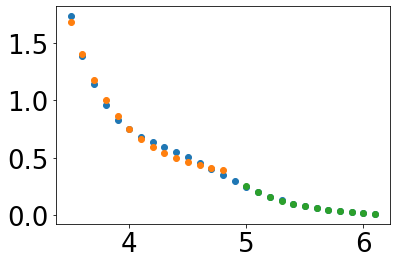

In [108]:
plt.plot(BE_FMO_raw[10:37].loc[:,["Distance"]].T.values[0], \
         -BE_FMO_raw[10:37].loc[:,["E(ct)_Kcal/mol"]].T.values[0], 'o', label='data')
plt.plot(x_dist_dec_fmo[:-1], exp_trend(x_dist_dec_fmo[:-1],*popt_dec_fmo), 'o', label='data')
plt.plot(x_dist_dec2_fmo, exp_trend(x_dist_dec2_fmo,*popt_dec2_fmo), 'o', label='data')